# 1. Project Description - Loan Default Prediction

## Background

<img src="https://www.homecredit.net/~/media/Images/H/Home-Credit-Group/logo/hcg-logo.png?h=71&iar=0&w=121" width="150">

Home Credit is a non-bank financial institution (fintech firm) founded in 1997 in the Czech Republic and headquartered in the Netherlands.The company operates in ten countries and focuses on installment lending primarily to people with little or no credit history. In short, the company focuses on the mass retail lending market catering to the financially underserved. By 2019, the company had served over 131m active customers, with total asset of EUR 26.1bn.

The company offers point-of-sale (POS) loans, cash loans, revolving loans, and other products through an online platform and a physical distribution network. The strategy in which the company works start by attracting customers to start from the point of sale funding (in stores), and then provides reliable ones with broader consumer credit products.

## Problem Statement

The income of any lending financial institution is the difference between the interest of loans charged to their clients, and the comparatively lower rates that supplied to them. Importantly, lenders only make a profit when a particular loan is repaid, and when a borrower does not repay the loan for a certain number of days, the loan is considered written off, and this affects the lender's net income and profitability. Hence, an ability to predict or estimate a borrower's repayment capability is very important to the lender.

Over 22 years of track record, Home Credit has accumulated a large amount of borrowers’ behavioral data. Along with traditional financal data, we would like to build predictive models that help them to efficiently analyze the risk associated with a given client and to also estimate the safe credit amount to be lent to customers, even with no credit history.

## Business Objectives and Constraints

### Objectives
- The main objective is to identify potential Defaulters based on the given data about the applicants

### Constraints
- The cost of making an error is high for Home Credit. It is important that the model do not miss out on potential defaulter which could incur financial losses to the organization

- No strict latency content, as the objective is more about making the right lending decision as opposed to a quick one.




## Source of Data:

- A structured datafile providing information about 307,155 loan application at Home Credit (up until 2019).
- Every loan has its own row and is identified by the feature `SK_ID_CURR`
- The feature `TARGET` indicates 0: the loan was repaid or 1: the loan was not repaid
- Additional 120+ features comprising traditional financial data (e.g. loan type, income, credit, annuity, enquiries to credit bureau) to alternative data (e.g. contact address vs home address, info about client's building, etc).


*Data Source:*
https://www.kaggle.com/competitions/home-credit-default-risk/data

*Note that in the full datasource includes more details about the borrowers (e.g. previous credit history obtained from the credit bureau department, past credit history, etc). For the purpose of this project however, we will only work on the main training dataset*


## Data Modeling Problem Considerations
- This is a Supervised Learning Classification Problem. The dataset that we are working on contains training data points along with the respective Class Labels, which represent whether a given applicant is a Defaulter or not.

- This is also a Binary Classification Problem, as there are only two classes: 1 (Defaulter) and 0 (Non-Defaulter).

- The dataset provided (see EDA below) is an imbalanced dataset. We would need to address this imbalance as some algorithms may be sensitive to data imbalance

- The dataset contains a large number of features, especially after taking into account the treatment to categorical data. A method to reduce the features (e.g. PCA) may need to be employed.

- Feature engineering can be considered to improve the performance of the model

- Data models: Logistic Regression, Linear SVM, Random Forest Classifier, XGBoost Classifier

## Performance Metrics
- ROC-AUC Score: This metric should be considered as it is insensitive to class imbalance.

- Confusion Matrix and associated metrics:
    - Recall Score: Ratio of __True Positives__ to the number of __Actual Positive__
    - Precision Score: Ratio of __True Positive__ to the __Total Positives__ predicted by the model
    - Note that we prefer a high __Recall Score__ even if it leads to low __Precision Score__, as we care more about minimizing False Negatives and we do not want to miss out on any Defaulter being classified as Non-Defaulter due to the high cost of error. If, vice versa, a Non-Defaulter is mis-classified as a Defaulter, the person can just re-apply for the application.
    
- RMSE, MAE can also be considered.

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# set pandas to display all columns
pd.set_option('display.max_columns', None)

# 2. Exploratory Data Analysis

In [2]:
df = pd.read_csv('Dataset/application_train.csv')
print('Training data shape:', df.shape)
df.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Brief explanation of dataset:
- We are working with 307,511 loan applications, with 122 columns.
- The second column, 'Target' is what we are after: whether there is a credit risk event:
    - (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

## 2.1 Analysis of Class Label Frequencies Reveals an Imbalanced Dataset

Analysis of distribution of Class Labels
    count          %
0  282686  91.927118
1   24825   8.072882


<AxesSubplot:ylabel='Frequency'>

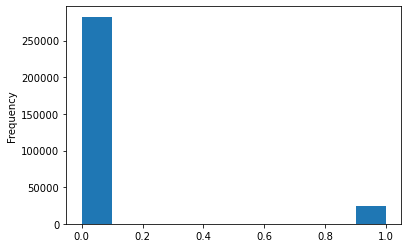

In [3]:
df_label = df['TARGET'].value_counts().to_frame()
df_label.columns = ['count']
df_label['%'] = (df_label['count'] / df_label['count'].sum()) * 100

print('Analysis of distribution of Class Labels')
print(df_label)

df['TARGET'].plot.hist()

<div class="alert alert-block alert-info">
<b>Note:</b> We have an imbalanced dataset. There are far more non-defaults (92%) than defaults (8%).
</div>

## 2.2 Missing Values Analysis

In [4]:
def show_mis_val(df):

    mis_val = df.isnull().sum()
    mis_val_percent = mis_val / len(df) * 100

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={0:'Missing Values', 1:'% Total'})
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% Total', ascending=False).round(1)

    mis_var_n = mis_val_table.shape[0]

    print(f'There are {mis_var_n} missing values, accounting to {mis_var_n/df.shape[1]*100:.0f}% of the total number of features.')
    print('')
    print('Top 20 features with missing values:\n')
    print(mis_val_table.head(20))

In [5]:
show_mis_val(df)

There are 67 missing values, accounting to 55% of the total number of features.

Top 20 features with missing values:

                          Missing Values  % Total
COMMONAREA_MEDI                   214865     69.9
COMMONAREA_AVG                    214865     69.9
COMMONAREA_MODE                   214865     69.9
NONLIVINGAPARTMENTS_MEDI          213514     69.4
NONLIVINGAPARTMENTS_MODE          213514     69.4
NONLIVINGAPARTMENTS_AVG           213514     69.4
FONDKAPREMONT_MODE                210295     68.4
LIVINGAPARTMENTS_MODE             210199     68.4
LIVINGAPARTMENTS_MEDI             210199     68.4
LIVINGAPARTMENTS_AVG              210199     68.4
FLOORSMIN_MODE                    208642     67.8
FLOORSMIN_MEDI                    208642     67.8
FLOORSMIN_AVG                     208642     67.8
YEARS_BUILD_MODE                  204488     66.5
YEARS_BUILD_MEDI                  204488     66.5
YEARS_BUILD_AVG                   204488     66.5
OWN_CAR_AGE                    

<div class="alert alert-block alert-info">
<b>Note:</b> We may have to fill in some missing values by imputation, or drop features with a high percentage of missing values. However as we cannot know for now which ones are important, we keep all of the columns for now.
</div>

## 2.3 Analysis of Column Types

In [6]:
# Number of each type of column
df_dtype = df.dtypes.value_counts().to_frame()
df_dtype.columns = ['count']
df_dtype['%'] = (df_dtype['count'] / df_dtype['count'].sum()) * 100
print(df_dtype)

         count          %
float64     65  53.278689
int64       41  33.606557
object      16  13.114754


In [7]:
# Number of unique classes in each object column
# df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

# df.loc[:, df.select_dtypes(include=['int64', 'float64']).nunique() <3]
a = list(df.loc[:, df.nunique() == 2].columns)

a = set(a)

# df.nunique()

<div class="alert alert-block alert-info">
<b>Note:</b> Within this dataset, c. 13% is categorical. We also see that most of them have relatively small number of unique values.
</div>

## 2.4 Correlation Analysis

To see the association between the features, and the feature with the target, we perform a correlation analysis. We will also use the results of the analysis for deeper EDA into selected features that are highly correlated with the target.

For correlation analysis we will use the Phi-K Correlation Coefficient Matrix. This measure is able to esimate the association between Categorical, Ordinal, and Continuous features. Thus, instead of using different test methods for each type of interaction, such as Chi-Square test, t-test, Pearson Correlation Coefficient, etc., the Phi-K Correlation Coefficient serves all three purposes.

> *The combined features of φK form an advantage over existing coefficients. First, it works consistently between categorical, ordinal and interval variables. Second, it captures non-linear dependency. Third, it reverts to the Pearson correlation coefficient in case of a bi-variate normal input distribution. (See references below)* 

We will use the Phi-K correlation coefficient to find association between Categorical-Categorical features, as well as between Numerical features. We will refrain from extending this to the full dataset as it is computationally expensive.



*references:*
- https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7
- https://arxiv.org/pdf/1811.11440.pdf


In [8]:
# get name of columns with numerical data and categorical data

coltype_num = list(df.select_dtypes(include=['int64', 'float64']).columns)
coltype_cat = list(df.select_dtypes(include=['object']).columns)

In [9]:
# we define the columns of categorical features and numerical features

binary_cols = set(df.loc[:, df.nunique() == 2].columns)
catonly_cols = set(coltype_cat)

coeff_cat_cols = list(set.union(binary_cols, catonly_cols))
coeff_cat_cols.insert(0, coeff_cat_cols.pop(coeff_cat_cols.index('TARGET'))) # shift 'TARGET' to front of list

coeff_num_cols = ['TARGET'] + list(set(coltype_num).difference(coeff_cat_cols))

# define dataframes to plot correlations
df_cat = df.loc[:, coeff_cat_cols]
df_num = df.loc[:, coeff_num_cols]

In [10]:
def display_phik_corr(phik_cat_overview, n=11, threshold=0.6):
    
    # We run a quick correlation analysis between the features:

    plt.figure(figsize=(20, 20))

    # visualize the phi-k correlations
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(phik_cat_overview.values, dtype=bool))
    sns.heatmap(phik_cat_overview, mask=mask, vmin=0, vmax=1, annot=False, cmap='Greens')
    plt.xticks(rotation = 90, fontsize = 10)
    plt.yticks(rotation = 0, fontsize = 10)
    plt.title('Phi-K Correlation Heatmap for Categorical Features', fontdict={'fontsize':15}, pad=16);
    plt.show()

    print('-'*50)

    # print the top 10 features in terms of phi-k correlation with target
    print(f'Top {n-1} categorical features in terms of phi-k correlation with target')
    print(phik_cat_overview['TARGET'].sort_values(ascending=False).head(11))

    print('')
    print('-'*50)
    print('')

    # print features which has high correlations with each other
    high_corr = []

    for col1 in phik_cat_overview:
        for col2 in phik_cat_overview:
            if phik_cat_overview.loc[col1, col2] > threshold and phik_cat_overview.loc[col1, col2] != 1:
                high_corr.append([col1, col2, phik_cat_overview.loc[col1, col2]])

    hc = pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Phi-K Corr']).drop_duplicates(subset=['Phi-K Corr']).sort_values(by=['Phi-K Corr'], ascending=False)
    print('Features with high correlation')
    print(hc)

## 2.4.1 Categorical Correlation Analysis

interval columns not set, guessing: ['TARGET', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_16', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_EMAIL', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_7', 'FLAG_PHONE', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_21', 'FLAG_CONT_MOBILE', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_20', 'FLAG_MOBIL', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_10', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_11', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_13']


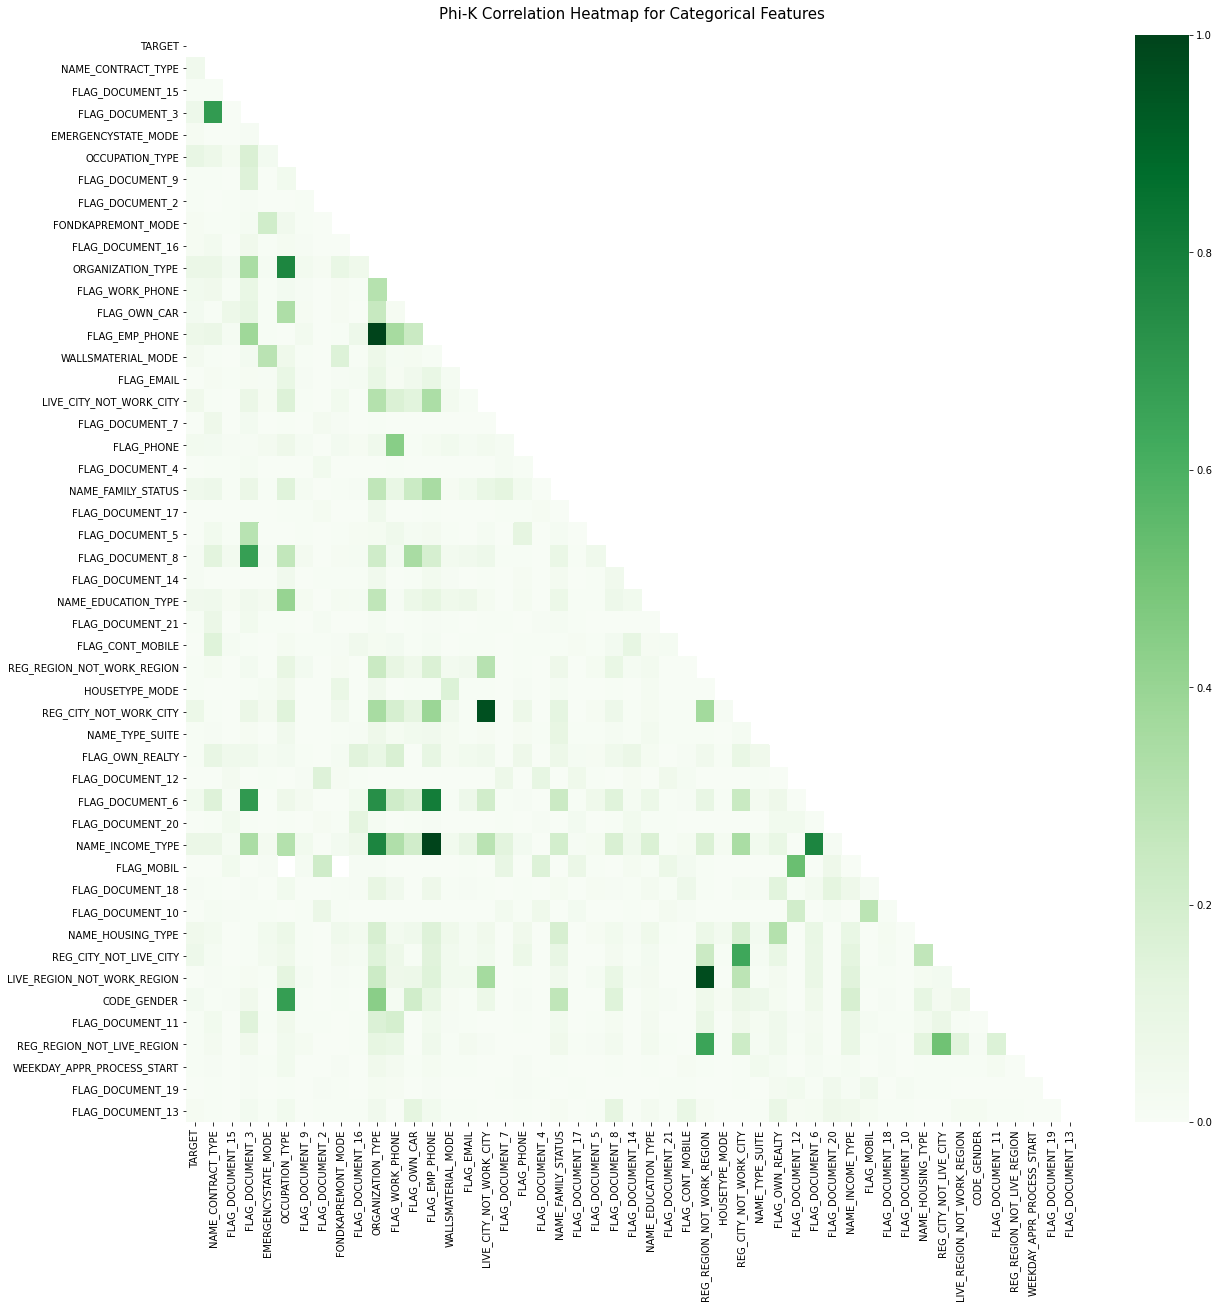

--------------------------------------------------
Top 10 categorical features in terms of phi-k correlation with target
TARGET                     1.000000
OCCUPATION_TYPE            0.102846
ORGANIZATION_TYPE          0.089164
NAME_INCOME_TYPE           0.084831
REG_CITY_NOT_WORK_CITY     0.079946
FLAG_EMP_PHONE             0.072087
REG_CITY_NOT_LIVE_CITY     0.069588
FLAG_DOCUMENT_3            0.069525
NAME_FAMILY_STATUS         0.056043
NAME_HOUSING_TYPE          0.051107
LIVE_CITY_NOT_WORK_CITY    0.050956
Name: TARGET, dtype: float64

--------------------------------------------------

Features with high correlation
                      Feature1                     Feature2  Phi-K Corr
12  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.976118
10     LIVE_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY    0.962696
9               FLAG_EMP_PHONE              FLAG_DOCUMENT_6    0.806903
8            ORGANIZATION_TYPE             NAME_INCOME_TYPE    0.775911
19        

In [11]:
import phik
    
phik_cat_overview = df_cat.phik_matrix()
display_phik_corr(phik_cat_overview)

### Observations:

- Note that the values of 𝜙k are between 0 and 1, so there is no indication of the direction of the relationship.


- In terms of correlation with target, we see that `OCCUPATION_TYPE`, `ORGANIZATION_TYPE`, `NAME_INCOME_TYPE`, `REG_CITY_NOT_WORK_CITY` have the highest correlations. We will delve deeper into these features in the EDA.


- In terms of correlations amongst features, we see that there are high correlations between:
    - The locations where the client registers, lives and works.
    - Income and organization, as well as occupation and organization.

## 2.4.2 Numerical Correlation Analysis

Given that calculating phi-k correlations are computationally expensive, we will use Pearson's correlation to analyze the numerical features.

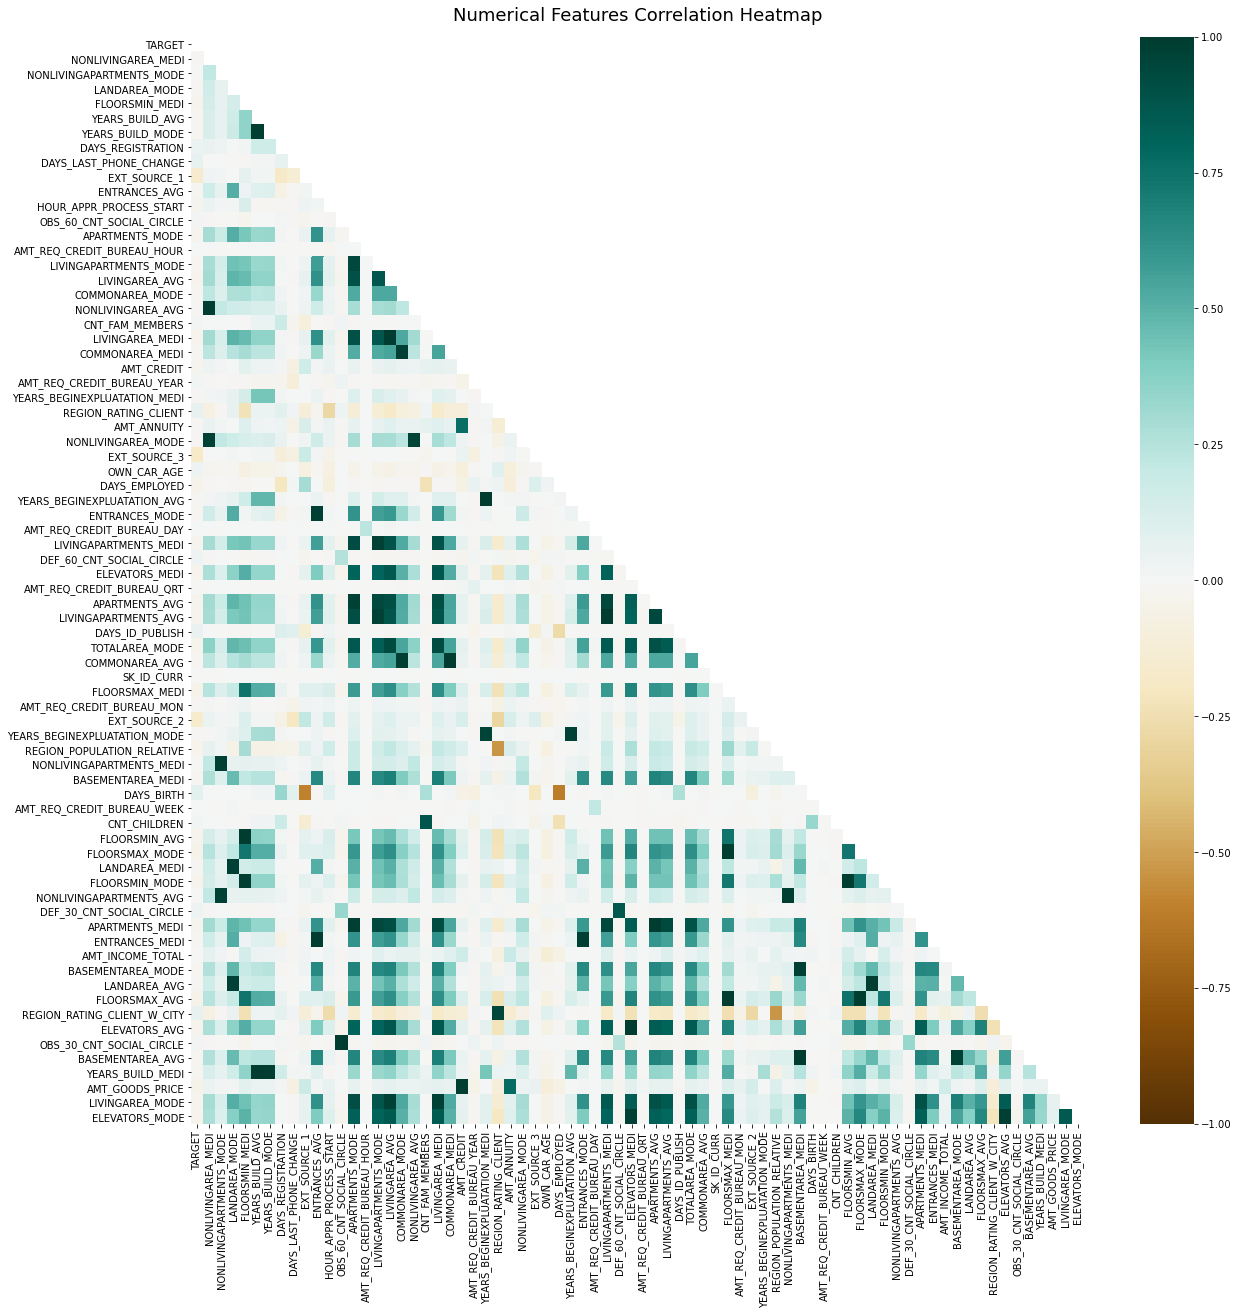

In [12]:
corr_num = df_num.corr()

plt.figure(figsize=(20, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_num, dtype=bool))
heatmap = sns.heatmap(corr_num, mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Numerical Features Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [13]:
# print the top 10 features in terms of Pearson's correlation with target

n = 11
threshold = 0.95

corr_num_abs = abs(corr_num)

print(f'Top {n-1} categorical features in terms of Pearson\'s correlation with target')
print(corr_num_abs['TARGET'].sort_values(ascending=False).head(11))

print('')
print('-'*50)
print('')

# print features which have high correlations with each other
high_corr = []

for col1 in corr_num_abs:
    for col2 in corr_num_abs:
        if corr_num_abs.loc[col1, col2] > threshold and corr_num_abs.loc[col1, col2] != 1:
            high_corr.append([col1, col2, corr_num_abs.loc[col1, col2]])

pd.set_option('display.max_rows', None)
            
hc = pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Corr']).drop_duplicates(subset=['Corr']).sort_values(by=['Corr'], ascending=False)
print('Features with high correlation')
print(hc)

Top 10 categorical features in terms of Pearson's correlation with target
TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
DAYS_EMPLOYED                  0.044932
FLOORSMAX_AVG                  0.044003
Name: TARGET, dtype: float64

--------------------------------------------------

Features with high correlation
                        Feature1                      Feature2      Corr
9                YEARS_BUILD_AVG              YEARS_BUILD_MEDI  0.998495
14      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE  0.998490
6                 FLOORSMIN_MEDI                 FLOORSMIN_AVG  0.997241
50                FLOORSMAX_MEDI                 FLOORSMAX_AVG  0.997034
13      

### Observations:

- From the correlation heatmap, we note that the correlations amongst the features are mixed. Some features are loosely correlated whereas others appear to have high correlations.


- In terms of correlations with `TARGET`, we note that `EXT_SOURCE` (which are credit ratings from external providers) have the highest correlations. Other important features seem to be the region, days employed and number of floors. Interestingly, factors such as income, and loan amount does not seem to be highly correlated with the Target. However, categorical features such as type of income and occupation seem to be of greater importance as they are more correlated.


- In terms of correlations amongst features, we noticed that there are many features with high correlations. We note that these features mainly pertain to apartment statistics:
    - A lot of apartment features are recorded in 3 different types of features - Average, Median and Mode (e.g. a feature for average of living area, one for the mode and another for the median). Naturally these features will be highly correlated.
    - In addition, many features of the apartments are highly correlated (e.g. number of elevators, living areas, etc).
 
 
- Besides apartment features, we also see some high correlation between `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `AMT_CREDIT`, as well as `DAYS_EMPLOYED` and `DAYS_BIRTH`.


*Ideally we do not want highly-correlated features in our dataset as they increase the time-complexity of the model. In feature reduction we may consider removing some of these features.*

---

### Plotting Functions for EDA:

In [14]:
def print_unique_categories(data, column_name, show_counts = False):
    
    '''
    Function to print the basic stats such as unique categories and their counts for categorical variables
    
        Inputs:
        data: DataFrame
            The DataFrame from which to print statistics
        column_name: str
            Column's name whose stats are to be printed
        show_counts: bool, default = False
            Whether to show counts of each category or not

    '''
    
    print('-'*100)
    print(f"The unique categories of '{column_name}' are:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Counts of each category are:\n{data[column_name].value_counts()}")
        print('-'*100)

In [15]:
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot)
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        ax2 = sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category)
        
        for p in ax2.patches:
            ax2.text(p.get_x() + horizontal_adjust, p.get_height(), '{:1.02f}%'.format(p.get_height()), fontsize = fontsize_percent)
            
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
        
    plt.show()

In [16]:
def plot_continuous_variables(data, column_name, plots = ['distplot', 'CDF', 'box', 'violin'], scale_limits = None, figsize = (20,8), histogram = True, log_scale = False):
    
    data_to_plot = data.copy()
    if scale_limits:
        #taking only the data within the specified limits
        data_to_plot[column_name] = data[column_name][(data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize = figsize)
    sns.set_style('whitegrid')
    
    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        
        if ele == 'CDF':
            #making the percentile DataFrame for both positive and negative Class Labels
            percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_0['Percentile'] = [ele / (len(percentile_values_0)-1) for ele in range(len(percentile_values_0))]
            
            percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[column_name]].dropna().sort_values(by = column_name)
            percentile_values_1['Percentile'] = [ele / (len(percentile_values_1)-1) for ele in range(len(percentile_values_1))]
            
            plt.plot(percentile_values_0[column_name], percentile_values_0['Percentile'], color = 'red', label = 'Non-Defaulters')
            plt.plot(percentile_values_1[column_name], percentile_values_1['Percentile'], color = 'black', label = 'Defaulters')
            plt.xlabel(column_name)
            plt.ylabel('Probability')
            plt.title('CDF of {}'.format(column_name))
            plt.legend(fontsize = 'medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(column_name + ' - (log-scale)')
            
        if ele == 'distplot':  
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                         label='Non-Defaulters', hist = False, color='red')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                         label='Defaulters', hist = False, color='black')
            plt.xlabel(column_name)
            plt.ylabel('Probability Density')
            plt.legend(fontsize='medium')
            plt.title("Dist-Plot of {}".format(column_name))
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')

        if ele == 'violin':  
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Violin-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

        if ele == 'box':  
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot)
            plt.title("Box-Plot of {}".format(column_name))
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

    plt.show()

---

## 2.5 Analysis of Categorical Variables

Based on the correlation analysis above, we analyze a select number of categorical features.

### `NAME_CONTRACT_TYPE`

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_CONTRACT_TYPE' are:
['Cash loans' 'Revolving loans']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_CONTRACT_TYPE = 2


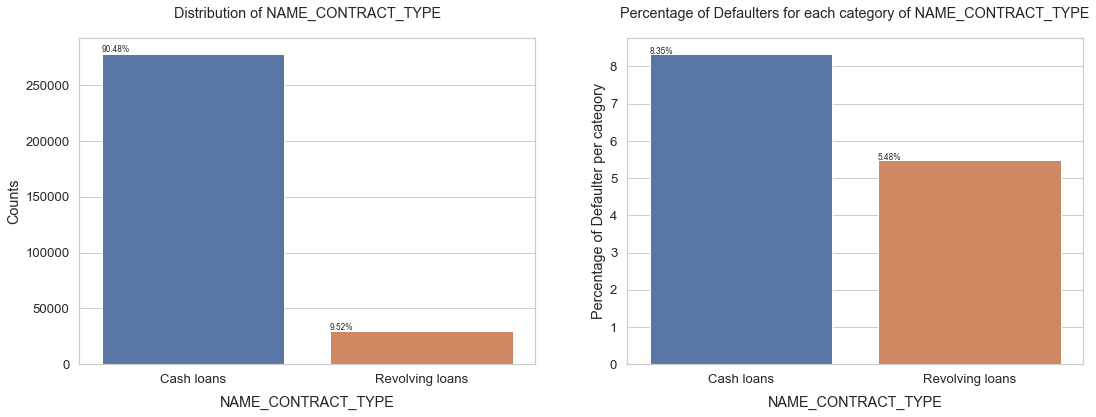

----------------------------------------------------------------------------------------------------


In [17]:
print_unique_categories(df, 'NAME_CONTRACT_TYPE')

plot_categorical_variables_bar(df, column_name = 'NAME_CONTRACT_TYPE')
print('-'*100)

### Observations (`NAME_CONTRACT_TYPE`):
- There are two types of loans offered by Home Credit: Cash loans and Revolving loans (e.g. credit cards). Most of the loans taken out are Cash loans (90%).
- Unsurprisingly, there is a higher percentage of defaulters from Cash loans.

### `CODE_GENDER`

----------------------------------------------------------------------------------------------------
The unique categories of 'CODE_GENDER' are:
['M' 'F' 'XNA']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of CODE_GENDER = 3


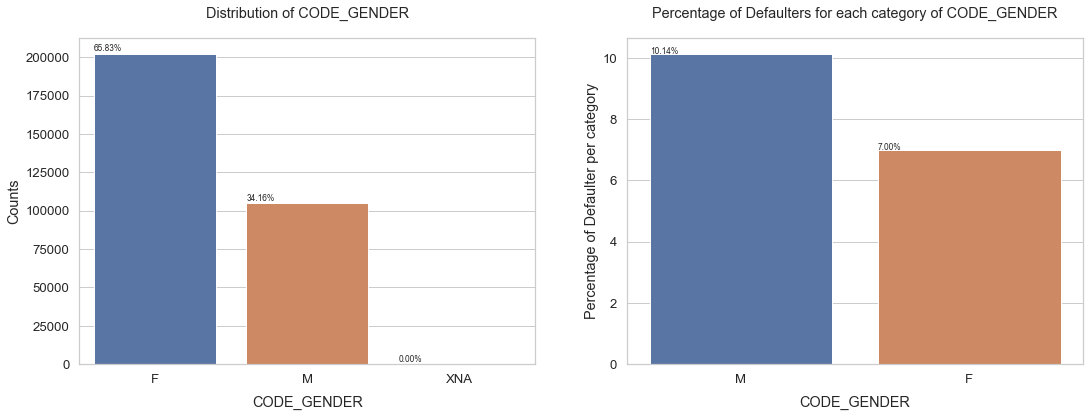

----------------------------------------------------------------------------------------------------


In [18]:
print_unique_categories(df, 'CODE_GENDER')
plot_categorical_variables_bar(df, column_name = 'CODE_GENDER')
print('-'*100)

In [19]:
df[df['CODE_GENDER']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,13.0,1,1,1,1,1,0,NaN,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,NaN,0.295998,0.461482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,NaN,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,NaN,0.709205,0.310818,0.0165,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0233,NaN,0.0115,NaN,0.0000,0.0168,0.0382,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0238,NaN,0.0120,NaN,0.0000,0.0167,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0237,NaN,0.0117,NaN,0.000,NaN,block of flats,0.0090,"Stone, brick",No,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,NaN,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.404970,0.659185,0.076984,0.0773,0.1353,0.9921,0.8912,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0630,0.0621,0.0000,NaN,0.0788,0.1404,0.9921,0.8955,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0689,0.0647,0.0000,NaN,0.0781,0.1353,0.9921,0.8927,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0641,0.0632,0.0000,NaN,reg oper spec account,block of flats,0.076

### Observations: `CODE_GENDER`

- There is a 'XNA' in this category which does not make any sense. This only has 4 customers, and all of these are Non-Defaults. Accordingly, we can consider dropping these customers.
- The majority of applicants are female. However, we see from the second plot that male applicants have higher rates of default.


- >df = df[df['CODE_GENDER'] != 'XNA']

### `NAME_INCOME_TYPE`

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_INCOME_TYPE' are:
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_INCOME_TYPE = 8


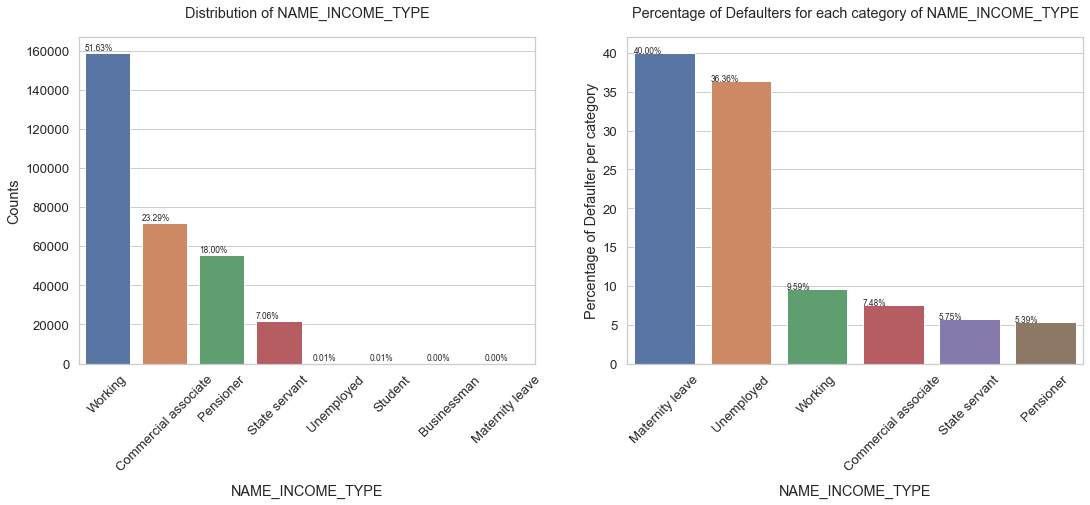

----------------------------------------------------------------------------------------------------


In [20]:
print_unique_categories(df, 'NAME_INCOME_TYPE')
plot_categorical_variables_bar(df, column_name = 'NAME_INCOME_TYPE', rotation=45)
print('-'*100)

### Observations (`INCOME_TYPE`)

- The top sources of income are from work, and being a commercial associate. There is also a adecent mount of retired people and public servants who applied for loans.


- In terms of default, it appears that applicants on Maternity leave and the Unemployed have the highest rates. This is not very surprising as these groups have less stable sources of income.

 ### `NAME_EDUCATION_TYPE`

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_EDUCATION_TYPE' are:
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_EDUCATION_TYPE = 5


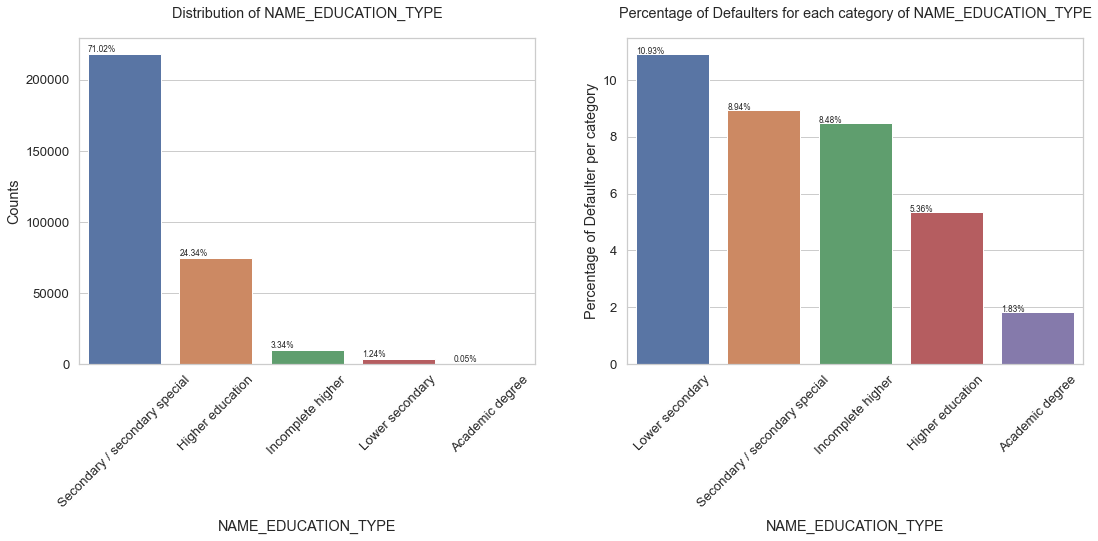

----------------------------------------------------------------------------------------------------


In [21]:
print_unique_categories(df, 'NAME_EDUCATION_TYPE')
plot_categorical_variables_bar(df, column_name = 'NAME_EDUCATION_TYPE', rotation=45)
print('-'*100)

### Observations (`EDUCATION_TYPE`):
- The majority of the applicants have up till Secondary-level education, indicating that most of the applications do not have a high level of education.


- The highest rate of default comes from Lower Secondary, and decreases as education level increases. Applicants with Academic degrees have the lower rate of default, but this inference may not be meaningful as there are very few of them in the applicants pool.

### `NAME_FAMILY_STATUS`

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_FAMILY_STATUS' are:
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_FAMILY_STATUS = 6


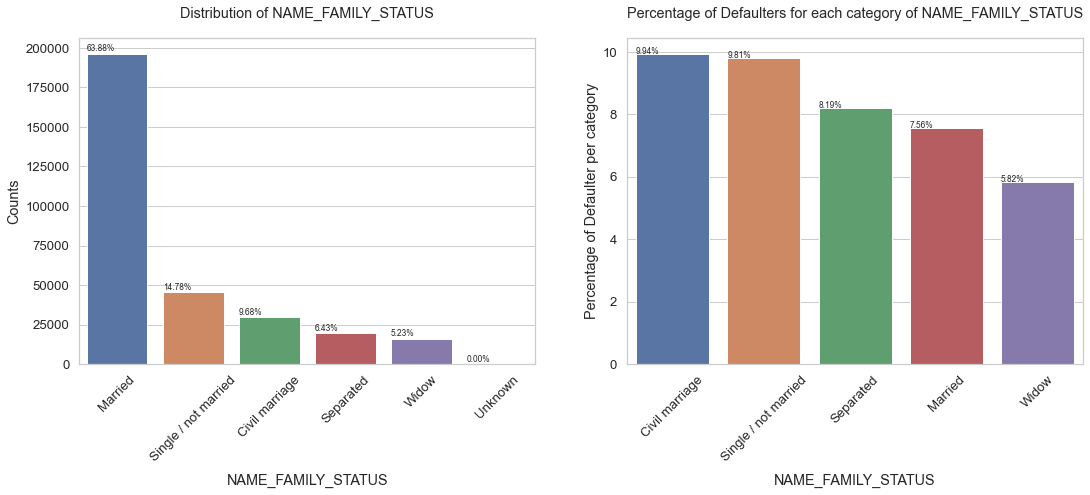

----------------------------------------------------------------------------------------------------


In [22]:
print_unique_categories(df, 'NAME_FAMILY_STATUS')
plot_categorical_variables_bar(df, column_name = 'NAME_FAMILY_STATUS', rotation=45)
print('-'*100)

### Observations (`NAME_FAMILY_STATUS`):

- The majority of applicants are married, but the highest rates of default are from Civil marriage and Single applicants.

### `NAME_HOUSING_TYPE`

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_HOUSING_TYPE' are:
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_HOUSING_TYPE = 6


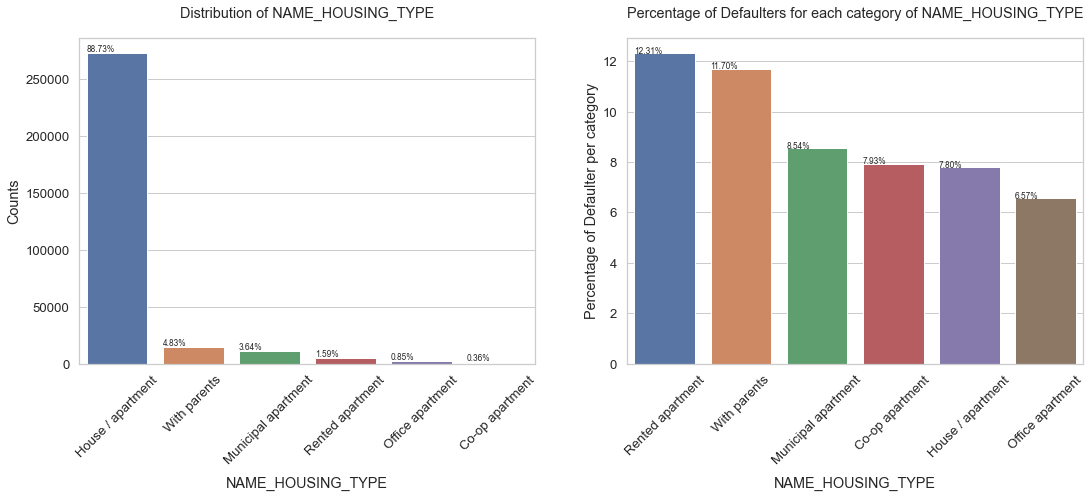

----------------------------------------------------------------------------------------------------


In [23]:
print_unique_categories(df, 'NAME_HOUSING_TYPE')
plot_categorical_variables_bar(df, column_name = 'NAME_HOUSING_TYPE', rotation=45)
print('-'*100)

### Observations (`NAME_HOUSING_TYPE`):

- 89% of applicants live in houses/apartments, which presumably belong to them. However, the housing types with the highest rates of default are Rented apartment, With parents, Municipal apartment (housing owned by government rented at minimum rates to needy) and Co-op apartment (the owners do not own their units outright; each resident is a shareholder based on the relative size of the unit), which are all arrangements whereby the applicants do not own the housing property. This could be an indicator of the applicants' financial difficulties.

### `OCCUPATION_TYPE`

----------------------------------------------------------------------------------------------------
The unique categories of 'OCCUPATION_TYPE' are:
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of OCCUPATION_TYPE = 19


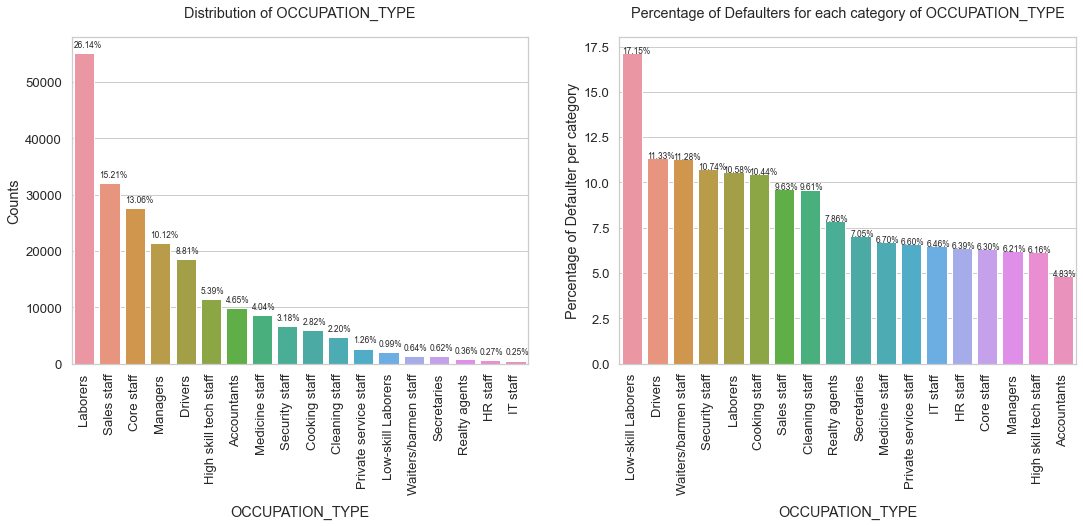

----------------------------------------------------------------------------------------------------


In [24]:
print_unique_categories(df, 'OCCUPATION_TYPE')
plot_categorical_variables_bar(df, column_name = 'OCCUPATION_TYPE', rotation=90)
print('-'*100)

### Observations - `OCCUPATION_TYPE`

- The applicants come from a myriad of occupation types, with the highest being Laborers, followed by Sales staff, Core staff and Managers.


- However, default rates are highest amongst Low-skill Laborers, followed by Drivers, Waiters, and Security staff. This suggests that more manual-based jobs (with typically lower income) have higher rates of default.

### `ORGANIZATION_TYPE`

Total Number of categories of ORGANIZATION_TYPE = 58


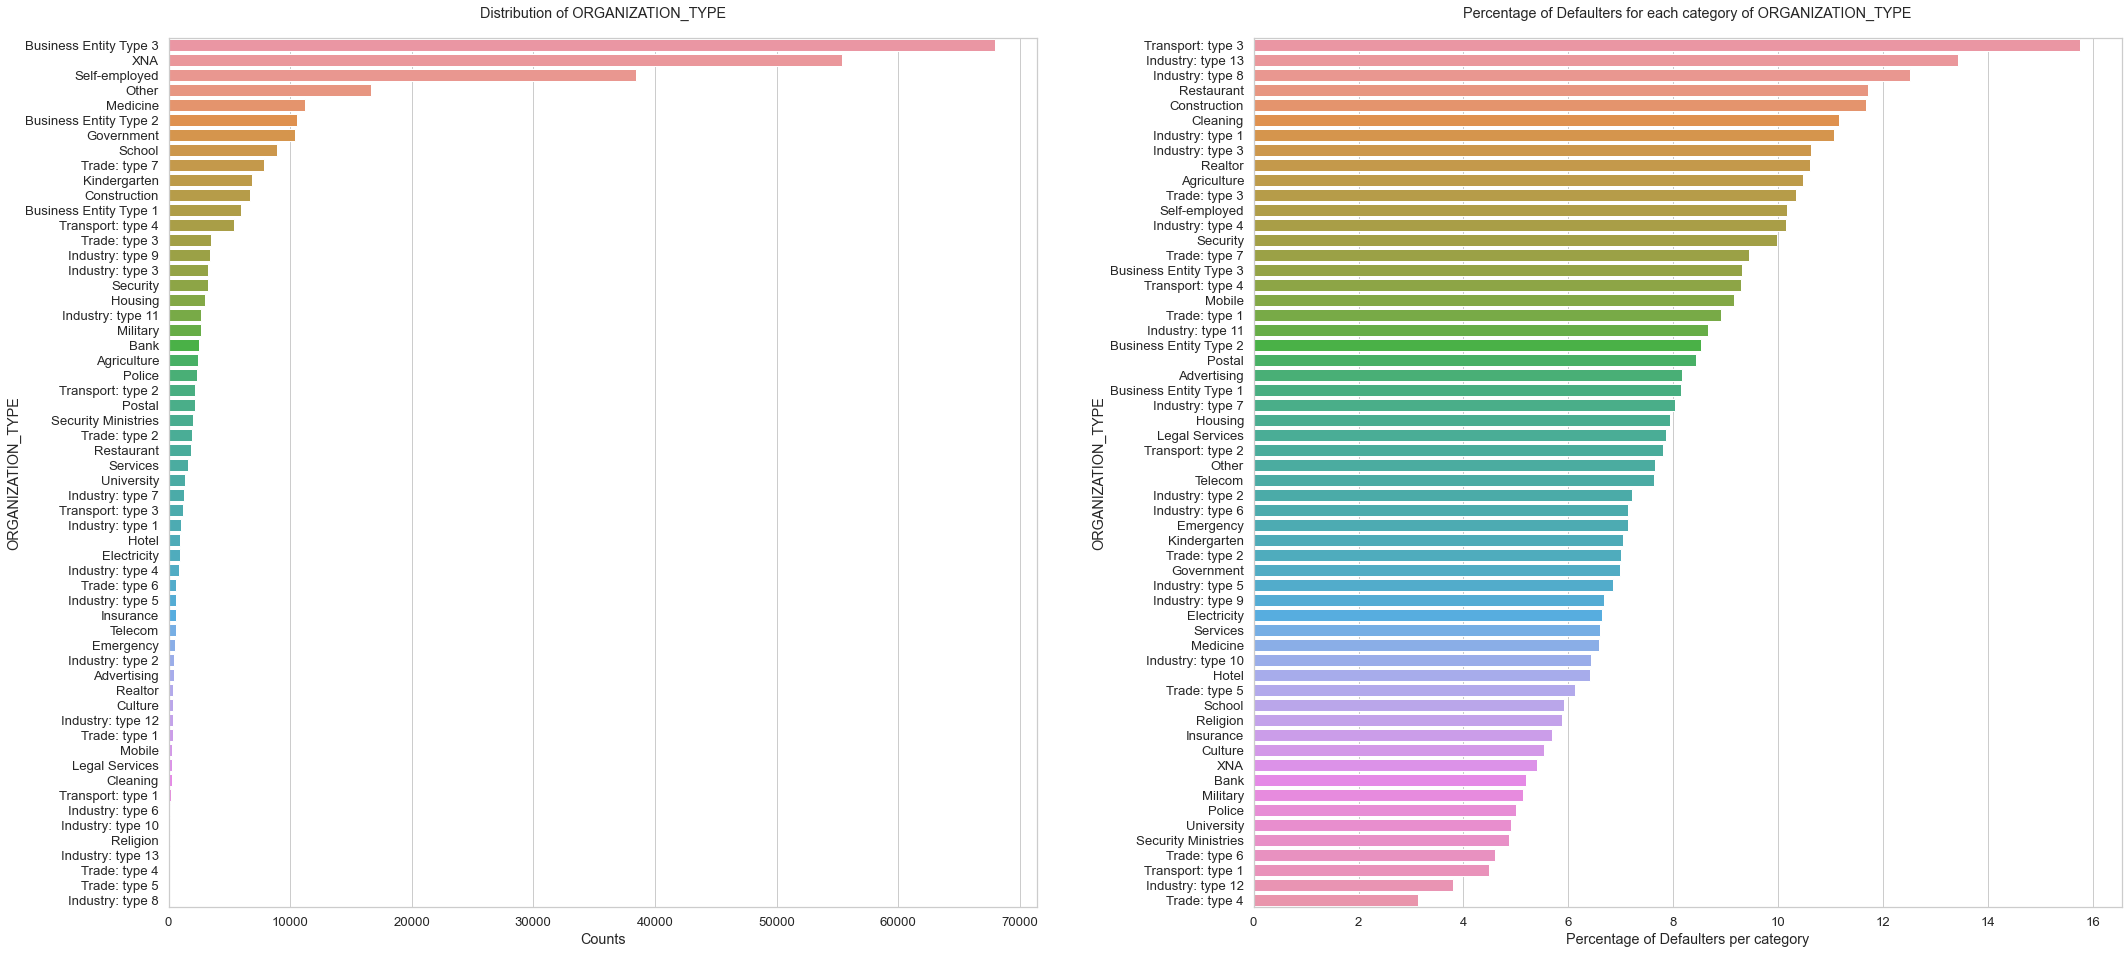

In [25]:
print(f"Total Number of categories of ORGANIZATION_TYPE = {len(df.ORGANIZATION_TYPE.unique())}")

plt.figure(figsize = (35,16))
sns.set(style = 'whitegrid', font_scale = 1.2)
plt.subplots_adjust(wspace=0.25)

plt.subplot(1,2,1)
count_organization = df.ORGANIZATION_TYPE.value_counts().sort_values(ascending = False)
sns.barplot(x = count_organization, y = count_organization.index)
plt.title('Distribution of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Counts')
plt.ylabel('ORGANIZATION_TYPE')

plt.subplot(1,2,2)
percentage_default_per_organization = df[df.TARGET == 1].ORGANIZATION_TYPE.value_counts() * 100 / count_organization
percentage_default_per_organization = percentage_default_per_organization.dropna().sort_values(ascending = False)
sns.barplot(x = percentage_default_per_organization, y = percentage_default_per_organization.index)
plt.title('Percentage of Defaulters for each category of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Percentage of Defaulters per category')
plt.ylabel('ORGANIZATION_TYPE')

plt.show()

### Observations - `ORGANIZATION_TYPE`

- This feature has the most categories in the dataset (58). From the plots and names however, it is difficult to discern what these business entities are.


- The majority of applicants claim that they work with a Business Entity, followed by XNA (likely did not specify the organization type).


- However, this does not match with the default rates, where the highest go to Transport, Industry, and Restaurant organizations.

### `REG_CITY_NOT_WORK_CITY`

----------------------------------------------------------------------------------------------------
The unique categories of 'REG_CITY_NOT_WORK_CITY' are:
[0 1]
----------------------------------------------------------------------------------------------------
Total Number of unique categories of REG_CITY_NOT_WORK_CITY = 2


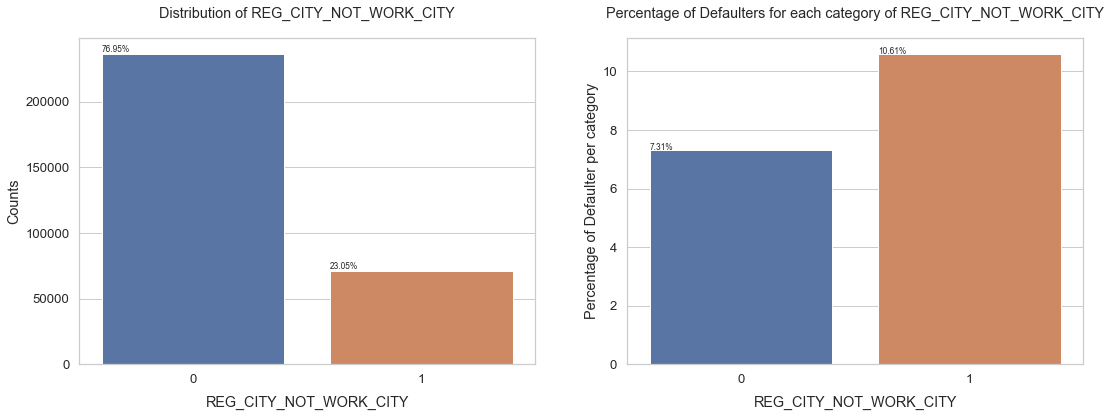

----------------------------------------------------------------------------------------------------


In [26]:
print_unique_categories(df, 'REG_CITY_NOT_WORK_CITY')
plot_categorical_variables_bar(df, column_name = 'REG_CITY_NOT_WORK_CITY', rotation=0)
print('-'*100)

### Observations - `REG_CITY_NOT_WORK_CITY`

- This feature labels whether the applicant is working in the same city as he/she had mentioned in the loan application or not.


- We observe that more than 76% of the clients work in the same city as registered, while only minority of clients work elsewhere.


- However, the Percentage of Defaulters for each category tells a different story. The clients who do not work in the registered city have higher Default Rate than the former.

## 2.6 Analysis of Numerical Variables

Similar to the Categorical features, we focus on numerical features that have higher correlations with the Target variable

### `EXT_SOURCE_1, 2, 3`

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


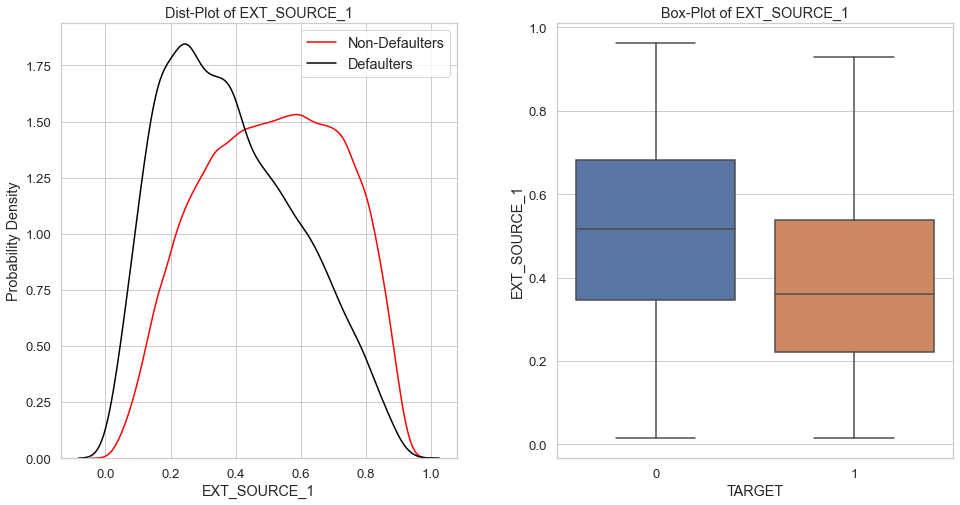

In [27]:
plot_continuous_variables(df, 'EXT_SOURCE_1', plots = ['distplot', 'box'], figsize = (16,8))

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


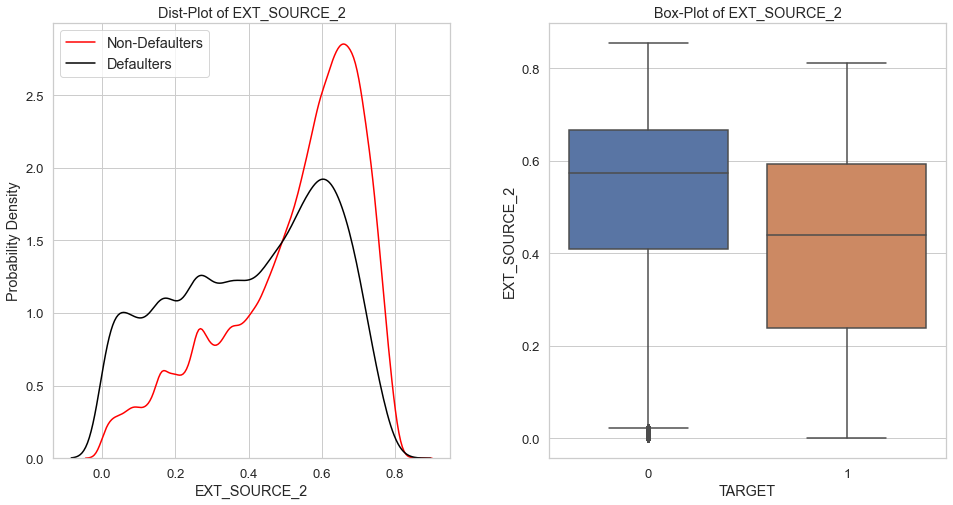

In [28]:
plot_continuous_variables(df, 'EXT_SOURCE_2', plots = ['distplot', 'box'], figsize = (16,8))

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


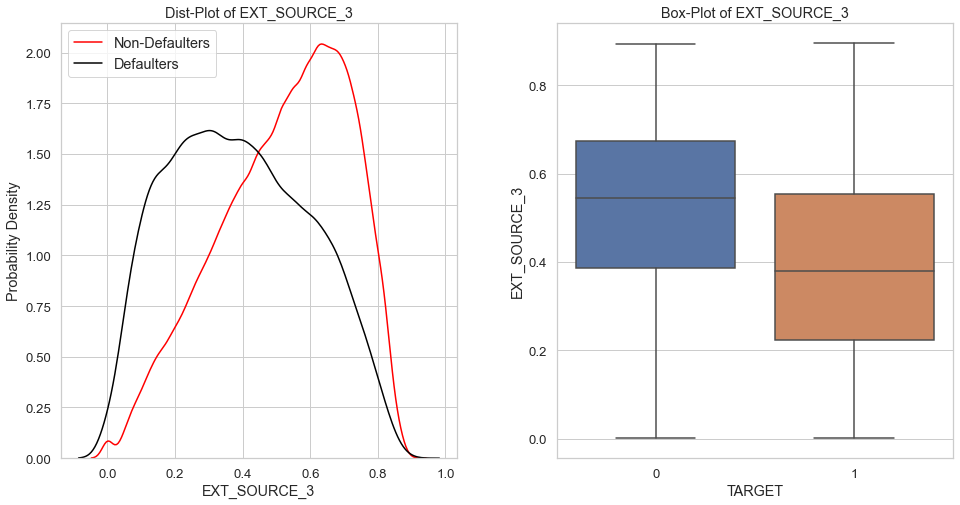

In [29]:
plot_continuous_variables(df, 'EXT_SOURCE_3', plots = ['distplot', 'box'], figsize = (16,8))

### Observations - `EXT_SOURCE`

- From both the KDE and boxplots, it is clear that the credit ratings of non-defaulters are higher than defaulters. In the KDE plots, the peaks of the non-defaulters occur at higher scores compared to the defaulters, and they have lower probability densities at lower scores.


-  Interestingly, the median scores of the defaulters are about the 1st quartile of the non-defaulters.


- Based on the KDE plots, `EXT_SOURCE_1 & 3` seem to show better separability between the two groups compared to `EXT_SOURCE_2`

### Age of Applicant - `DAYS_BIRTH`

The data is in days and negative (calculated from the day the application is made). We will convert them into positive years to ease analysis

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


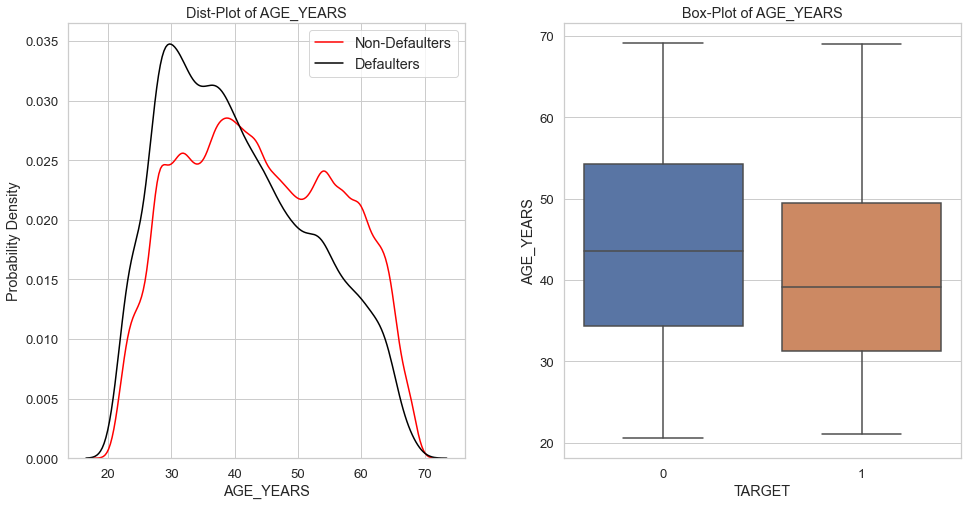

In [30]:
df['AGE_YEARS'] = df['DAYS_BIRTH'] / 365 * (-1)
plot_continuous_variables(df, 'AGE_YEARS', plots = ['distplot', 'box'], figsize = (16,8))
df = df.drop(columns=['AGE_YEARS'])

### Observations - `AGE_YEARS`

- Generally, the Defaulters are younger, and the range of age is narrower compared to non-defaulters. Defaulters are mostly concentrated within the ages of 30-40.


- Non-defaulters' ages span more or less evenly through the ages 30-60.

### `DAYS_LAST_PHONE_CHANGE`

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


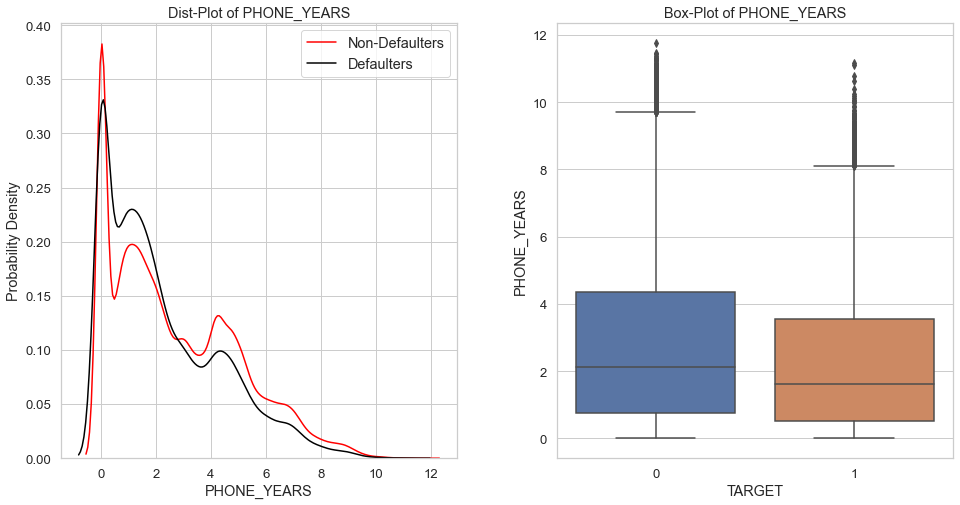

In [31]:
df['PHONE_YEARS'] = df['DAYS_LAST_PHONE_CHANGE'] / 365 * (-1)
plot_continuous_variables(df, 'PHONE_YEARS', plots = ['distplot', 'box'], figsize = (16,8))
df = df.drop(columns=['PHONE_YEARS'])

### Observations - `PHONE_YEARS`

- The feature measures the amount of time the applicants last changed phone prior to the application.


- While the KDE plot does not show a discernible difference, the box-plot indicates that non-defaulters overall held on to their phones for a longer time.

### `DAYS_ID_PUBLISH`

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


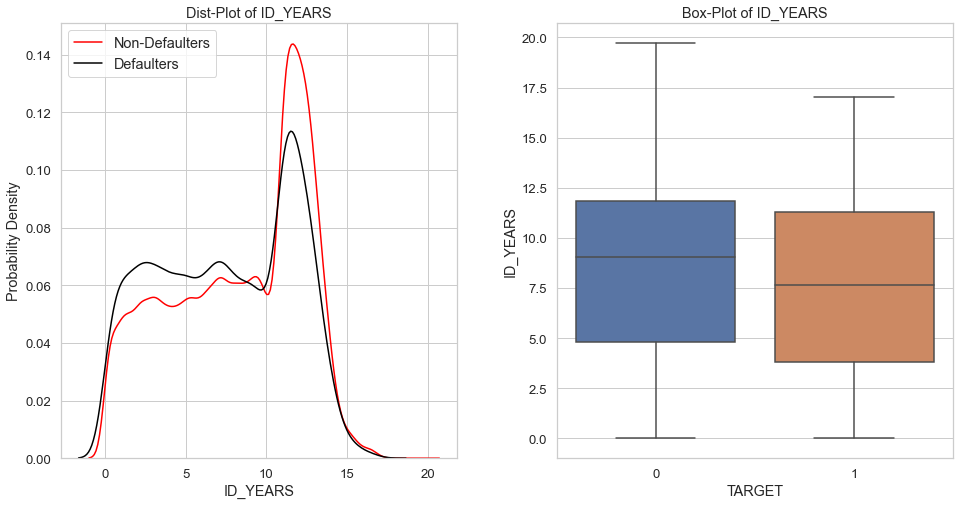

In [32]:
df['ID_YEARS'] = df['DAYS_ID_PUBLISH'] / 365 * (-1)
plot_continuous_variables(df, 'ID_YEARS', plots = ['distplot', 'box'], figsize = (16,8))
df = df.drop(columns=['ID_YEARS'])

### Observations - `ID_YEARS`

- The feature measures the amount of time the applicants last changed the identity document with which they applied for the loan.

- While the KDE plot does not show a discernible difference, the box-plot indicates that non-defaulters overall held on to the same identity document for a longer time.

### `DAYS_EMPLOYED`

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


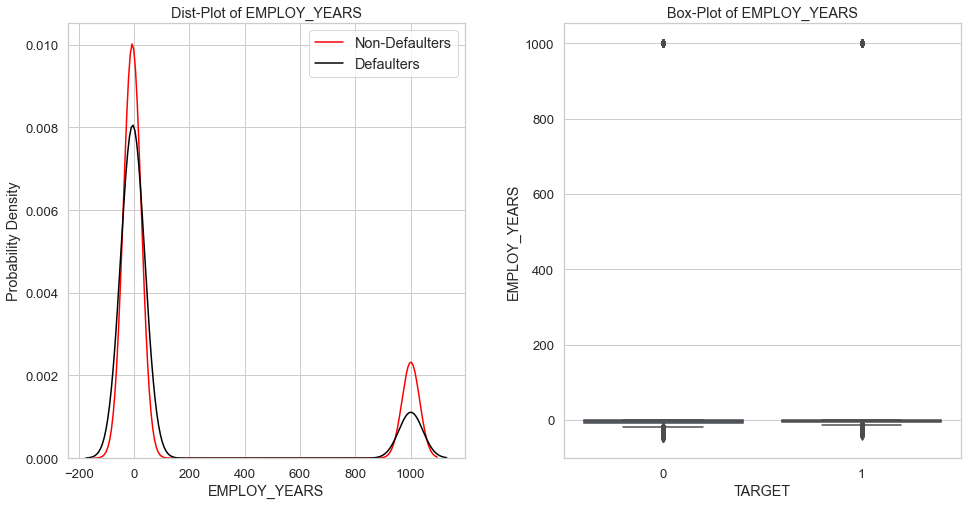

In [33]:
df['EMPLOY_YEARS'] = df['DAYS_EMPLOYED'] / 365
plot_continuous_variables(df, 'EMPLOY_YEARS', plots = ['distplot', 'box'], figsize = (16,8))
df = df.drop(columns=['EMPLOY_YEARS'])

We note that there are extreme values (employment years in the 1000s). This should be an error in the dataset and we will remove this from the dataset.

In [34]:
# Replace the anomalous values with nan
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


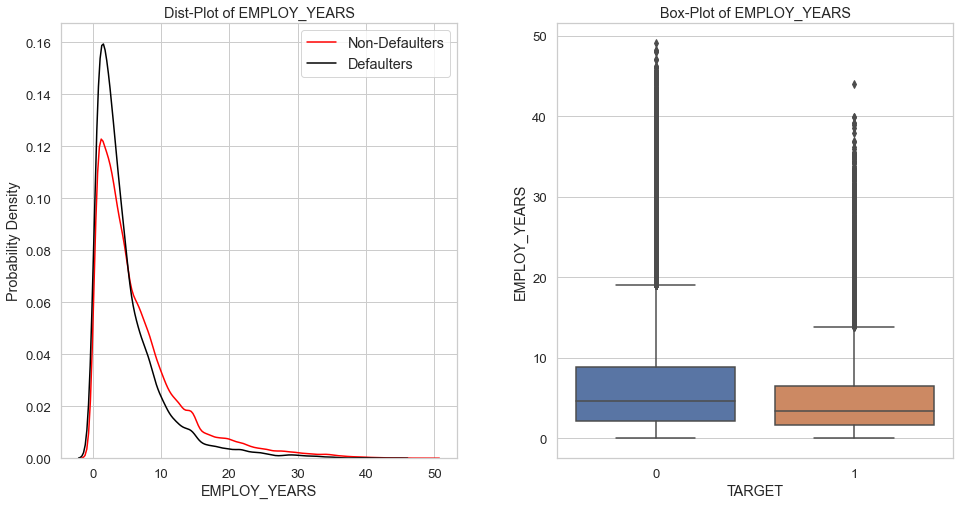

In [35]:
df['EMPLOY_YEARS'] = df['DAYS_EMPLOYED'] / 365 * (-1)
plot_continuous_variables(df, 'EMPLOY_YEARS', plots = ['distplot', 'box'], figsize = (16,8))
df = df.drop(columns=['EMPLOY_YEARS'])

### Observation - `EMPLOY_YEARS`

- Overall, the time of employment is lower for defaulters compared to non-defaulters. 

### `FLOORSMAX_AVG`

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


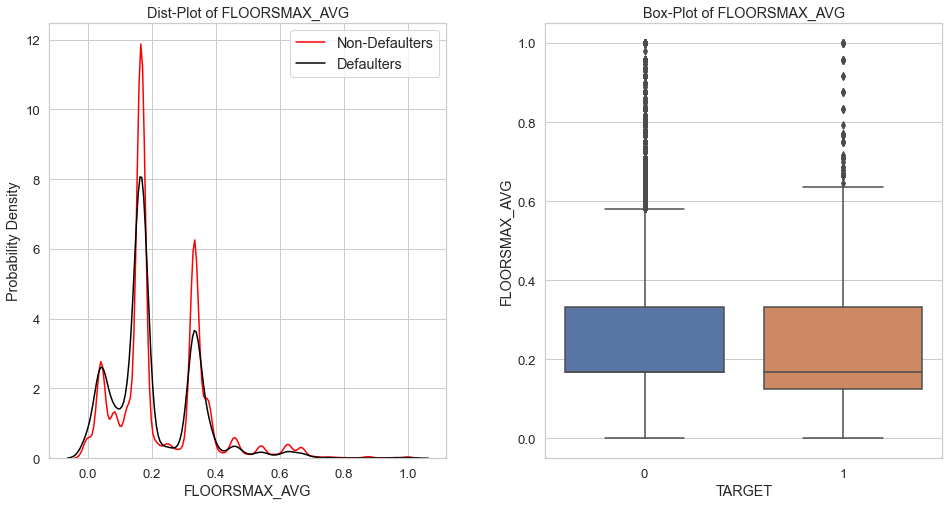

In [36]:
plot_continuous_variables(df, 'FLOORSMAX_AVG', plots = ['distplot', 'box'], figsize = (16,8))

### Observation - `FLOORSMAX_AVG`

- This feature shows normalized information about the building where the applicant lives, specifically pertaining to the maximum number of floors.


- The defaulters have lower median value of FLOORSMAX_AVG feature as compared to Non-Defaulters. The 75th percentile values of both the Defaulters and Non-Defaulters is more or less the same, but the 25th percentile value of Non-Defaulters is almost more than the median of Defaulters.

## 2.7 Summaries from EDA

- Some categorical features are effective in differentiating between the Defaulters and Non-Defaulters, for example OCCUPATION_TYPE, ORGANIZATION_TYPE, REG_CITY_NOT_WORK_CITY, etc., which could prove to be important for the classification purpose. The same goes for some Continuous features as well, noticeably the EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 features.


- There are few Continuous Numerical Variables which contain Erroneous points, such as DAYS_EMPLOYED, etc., which would need to be handled during Data Cleaning.


- We also noticed some correlated features from the correlation analysis, which would be increasing the dimensionality of data without adding much value. We would ideally want to remove such features, provided they don’t degrade the performance of the model.


- The dataset is imbalanced, and we would need to come up with techniques to handle it.


- For Default Risk prediction, the Defaulters usually tend to have some behavior which deviate from the normal, and thus, we cannot remove outliers or far-off points, as they may suggest some important Defaulting tendency.

# 3. Feature Reduction (Based on Correlation Analysis)

- Our raw dataset has 121 columns of numerical and categorical features. With the encoding of categorical features, the total number of features balloon to 200+ features. The sheer number of features cannot be handled by algorithms such as the simple Logistic Regression, and even using Principal Component Analysis fails to yield any meaningful result.


- Accordingly, we will first reduce our number of features. We will base our features on those that have the highest correlations with the target variable. We will also supplement that with some knowledge on basic credit evaluation criteria.


In [37]:
def print_feat_corr(corr_mat, threshold=0.5, show=True):
    
    # function prints the correlations between features
    
    corr_mat_abs = abs(corr_mat)
    
    # print features which have high correlations with each other
    high_corr = []

    for col1 in corr_mat:
        for col2 in corr_mat:
            if corr_mat_abs.loc[col1, col2] > threshold and corr_mat_abs.loc[col1, col2] != 1:
                high_corr.append([col1, col2, corr_mat.loc[col1, col2]])

    pd.set_option('display.max_rows', None)

    hc = pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Corr']).sort_values(by=['Corr'], ascending=False)    
    hc_drop_dup = pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Corr']).drop_duplicates(subset=['Corr']).sort_values(by=['Corr'], ascending=False)
    
    if show:
        print('Features with high correlation')
        print(hc_drop_dup)
    
    return hc_drop_dup


def find_top_correlations(feat_corr_cat, n=10, threshold=0.7, show=False):

# this function generates a list of top features that are correlated with the target
# as well as dataframe that shows if there are correlations betwwen the top features in the list

# n: the number of features to show
# threshold: filter for correlations above the threshold between the listed features
# show: whether to display the list

    # generate dataframe of correlations between the features that are above a certain threshold
    hc = print_feat_corr(feat_corr_cat, threshold, show)

    feat_corr_cat_ordered = feat_corr_cat[feat_corr_cat['TARGET'] != 0].sort_values('TARGET', ascending=False).index
    feat_corr_cat_ordered = pd.DataFrame(feat_corr_cat_ordered, columns=['Ordered_Feat']).head(n+1)
    feat_corr_cat_ordered = feat_corr_cat_ordered[feat_corr_cat_ordered['Ordered_Feat'] != 'TARGET']

    # build a list of features to keep
    cat_feats_keep = feat_corr_cat_ordered['Ordered_Feat'].tolist()

    # show if there are high correlations between the features to keep
    corr_cat_features = pd.merge(feat_corr_cat_ordered, hc, left_on='Ordered_Feat', right_on='Feature1')
    corr_cat_features = corr_cat_features.drop(columns=['Feature1'], axis=1)
    a = corr_cat_features.copy()
    corr_cat_features = a[a['Feature2'].isin(cat_feats_keep)]
    
    return cat_feats_keep, corr_cat_features

## 3.1 Categorical Feature Selection

In [38]:
# define the correlations for both categorical data

feat_corr_cat = phik_cat_overview

In [39]:
feat_corr_cat

,TARGET,NAME_CONTRACT_TYPE,FLAG_DOCUMENT_15,FLAG_DOCUMENT_3,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,FLAG_DOCUMENT_9,FLAG_DOCUMENT_2,FONDKAPREMONT_MODE,FLAG_DOCUMENT_16,ORGANIZATION_TYPE,FLAG_WORK_PHONE,FLAG_OWN_CAR,FLAG_EMP_PHONE,WALLSMATERIAL_MODE,FLAG_EMAIL,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_7,FLAG_PHONE,FLAG_DOCUMENT_4,NAME_FAMILY_STATUS,FLAG_DOCUMENT_17,FLAG_DOCUMENT_5,FLAG_DOCUMENT_8,FLAG_DOCUMENT_14,NAME_EDUCATION_TYPE,FLAG_DOCUMENT_21,FLAG_CONT_MOBILE,REG_REGION_NOT_WORK_REGION,HOUSETYPE_MODE,REG_CITY_NOT_WORK_CITY,NAME_TYPE_SUITE,FLAG_OWN_REALTY,FLAG_DOCUMENT_12,FLAG_DOCUMENT_6,FLAG_DOCUMENT_20,NAME_INCOME_TYPE,FLAG_MOBIL,FLAG_DOCUMENT_18,FLAG_DOCUMENT_10,NAME_HOUSING_TYPE,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,CODE_GENDER,FLAG_DOCUMENT_11,REG_REGION_NOT_LIVE_REGION,WEEKDAY_APPR_PROCESS_START,FLAG_DOCUMENT_19,FLAG_DOCUMENT_13
TARGET,1.000000,0.048399,0.009587,0.069525,0.018600,0.102846,0.006056,0.006475,0.018009,0.017927,0.089164,0.044678,0.034179,0.072087,0.027739,0.000000,0.050956,0.000000,0.037258,0.001394,0.056043,0.003790,0.000000,0.012271,0.014416,0.046954,0.004497,0.000000,0.010486,0.007787,0.079946,0.008746,0.009212,0.000000,0.044791,0.000000,0.084831,0.003314,0.012056,0.000000,0.051107,0.069588,0.003343,0.032921,0.005843,0.008207,0.005163,0.000000,0.017812
NAME_CONTRACT_TYPE,0.048399,1.000000,0.011637,0.684216,0.003638,0.071103,0.009815,0.000000,0.009225,0.036602,0.083438,0.052731,0.005626,0.086119,0.011420,0.016705,0.007297,0.066342,0.033434,0.005313,0.066888,0.000000,0.045965,0.133001,0.000000,0.055009,0.087052,0.151734,0.024573,0.000000,0.006431,0.013302,0.105270,0.000000,0.154530,0.010726,0.082317,0.002689,0.011385,0.021089,0.037330,0.021118,0.012100,0.008381,0.040583,0.028942,0.013267,0.007261,0.007000
FLAG_DOCUMENT_15,0.009587,0.011637,1.000000,0.000000,0.001233,0.025744,0.000000,0.010573,0.007819,0.003792,0.032890,0.011552,0.071842,0.022190,0.000944,0.003910,0.000000,0.003558,0.012074,0.007116,0.009028,0.002235,0.005481,0.036554,0.000000,0.016044,0.001030,0.019561,0.002467,0.000000,0.000000,0.000000,0.055863,0.028528,0.014905,0.041080,0.020221,0.040537,0.003006,0.014872,0.001548,0.002227,0.004698,0.012484,0.000000,0.000000,0.000000,0.000000,0.000000
FLAG_DOCUMENT_3,0.069525,0.684216,0.000000,1.000000,0.015054,0.172761,0.152998,0.014848,0.019611,0.052336,0.343938,0.094587,0.109687,0.380534,0.034490,0.018634,0.084573,0.033516,0.012260,0.021351,0.083404,0.002286,0.299760,0.668019,0.001473,0.049867,0.039652,0.009239,0.032864,0.010490,0.088223,0.017991,0.057754,0.000000,0.691640,0.011008,0.341809,0.000000,0.012138,0.010160,0.009157,0.003968,0.017148,0.052680,0.145826,0.052726,0.013899,0.014292,0.031623
EMERGENCYSTATE_MODE,0.018600,0.003638,0.001233,0.015054,1.000000,0.033184,0.002056,0.000000,0.211348,0.010795,0.022370,0.007882,0.009223,0.004357,0.296322,0.012931,0.017807,0.000000,0.030869,0.000000,0.006773,0.000000,0.002772,0.015069,0.000000,0.027991,0.006314,0.000000,0.003072,0.019726,0.029878,0.001700,0.022006,0.010205,0.000000,0.000000,0.028879,0.015437,0.000000,0.004913,0.040759,0.037736,0.004750,0.000793,0.005011,0.000000,0.005917,0.000000,0.008766
OCCUPATION_TYPE,0.102846,0.071103,0.025744,0.172761,0.033184,1.000000,0.046037,0.000000,0.048120,0.025048,0.770191,0.034673,0.335431,0.003758,0.059680,0.098796,0.159378,0.004950,0.064185,0.000000,0.146794,0.011160,0.000000,0.265711,0.047458,0.403467,0.009468,0.026862,0.105587,0.053210,0.146128,0.048805,0.033841,0.000000,0.064046,0.011598,0.313100,NaN,0.042247,0.000000,0.081085,0.061101,0.125273,0.672442,0.054575,0.040761,0.043480,0.005907,0.043409
FLAG_DOCUMENT_9,0.006056,0.009815,0.000000,0.152998,0.002056,0.046037,1.000000,0.004907,0.011665,0.012591,0.038531,0.012542,0.017066,0.037284,0.010795,0.014454,0.007062,0.000000,0.020008,0.002322,0.021406,0.010578,0.011490,0.028946,0.000000,0.026514,0.000000,0.011559,0.031500,0.001464,0.000000,0.000000,0.004629,0.015570,0.030245,0.000000,0.043879,0.022379,0.000000,0.007614,0.004179,0.007695,0.023406,0.00

In [40]:
cat_feats_keep, corr_cat_features = find_top_correlations(feat_corr_cat, n=15, threshold=0.7, show=False)

In [41]:
cat_feats_keep

['OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_3',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'FLAG_DOCUMENT_6',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE']

In [42]:
corr_cat_features

,Ordered_Feat,Feature2,Corr
0,OCCUPATION_TYPE,ORGANIZATION_TYPE,0.770191
1,ORGANIZATION_TYPE,NAME_INCOME_TYPE,0.775911
2,ORGANIZATION_TYPE,FLAG_DOCUMENT_6,0.730549
3,FLAG_EMP_PHONE,FLAG_DOCUMENT_6,0.806903
4,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.962696
5,FLAG_DOCUMENT_6,NAME_INCOME_TYPE,0.774435


In [43]:
# Based on analysis above, and also on EDA above, we choose our most important categorical features to be:

cat_feats = ['OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER']

### Observations and Comments:

- We chose 10 key categorical features based on our correlation analysis above. The features that were chosen have relatively high correlations with the target variable, and are not highly correlated with each other.


- This was also supported by EDA as well, where we see that types of occupation, income and gender can make a difference when it comes to defaulting or not. We discarded the organization type, as it is highly correlated to occupation and income. In addition, there are many categories in this feature which did not lead to much discernible difference from EDA.

## 3.2 Numerical Feature Selection

In [44]:
# define the correlations for both numerical data

feat_corr_num = abs(corr_num)

In [45]:
feat_corr_num.loc['AMT_CREDIT', 'AMT_ANNUITY']

0.7701380033118846

In [46]:
num_feats_keep, corr_num_features = find_top_correlations(feat_corr_num, n=20, threshold=0.5, show=False)

In [47]:
num_feats_keep

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'DAYS_REGISTRATION',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'REGION_POPULATION_RELATIVE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI']

In [48]:
corr_num_features

,Ordered_Feat,Feature2,Corr
0,EXT_SOURCE_1,DAYS_BIRTH,0.600610
1,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950842
2,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.532877
3,DAYS_EMPLOYED,DAYS_BIRTH,0.615864
4,FLOORSMAX_AVG,ELEVATORS_AVG,0.680078
8,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997034
9,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.988237
10,FLOORSMAX_MEDI,FLOORSMIN_AVG,0.739928
12,FLOORSMAX_MEDI,ELEVATORS_AVG,0.677771
17,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985689


In [49]:
# Based on analysis above, and also on EDA above, we choose our most important numerical features to be:

num_feats = ['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'DAYS_EMPLOYED',
 'FLOORSMAX_AVG',
 'DAYS_REGISTRATION',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY']

### Observations and Comments:

- We have chosen 15 key numerical features based on our analysis above and in a similar method as for categorical features.


- We note that some basic financial metrics: namely income, credit and instalments, are not relatively highly correlated with the target variable (income and credit are also not highly correlated, although credit and instalments are understandably correlated). However, we include them in our features as they are deemed important in the domain.

## 3.3 Building the Reduced Dataset

We build a dataset with trimmed features based on our analysis above

In [50]:
# create a list of features to keep, based on analysis above
feats_to_keep = ['TARGET'] + num_feats + cat_feats

# import fresh set of raw dataframe
df = pd.read_csv('Dataset/application_train.csv')

# create the reduced dataframe
df = df[feats_to_keep].copy()

# 4. Data Cleaning

We clean the data as per below:

- After the EDA, we identified two features: `DAYS_EMPLOYED` and `CODE_GENDER` which contains erroneous data and needs to be cleaned.


- We will convert several features - namely in units of days to years.


In [51]:
df.columns.sort_values()

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_EMP_PHONE', 'FLOORSMAX_AVG',
       'LIVE_CITY_NOT_WORK_CITY', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'OWN_CAR_AGE', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'TARGET'],
      dtype='object')

In [52]:
# Remove erroneous data
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(df['DAYS_EMPLOYED'].max(), np.nan)
df = df[df['CODE_GENDER'] != 'XNA']

# convert days to years
df['DAYS_BIRTH'] = df['DAYS_BIRTH'] / 365 * (-1)
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'] / 365 * (-1)
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'] / 365 * (-1)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'] / 365 * (-1)
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'] / 365 * (-1)

# decrease the large monetary amounts by 100,000
large_amt = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
df[large_amt] = df[large_amt] / 1e5

# convert some data to categorical data
df['REGION_RATING_CLIENT_W_CITY'] = df['REGION_RATING_CLIENT_W_CITY'].astype('object')

# get names of column with numerical datatypes
coltype_num = list(df.select_dtypes(include=['int64', 'float64']).columns)
coltype_cat = list(df.select_dtypes(include=['object']).columns)

num_feat = df[coltype_num].nunique()
num_feat = pd.DataFrame(num_feat).reset_index()
num_feat.columns = ['Features', 'UniqueValues']

bin_feat = list(num_feat[num_feat['UniqueValues'] <= 2]['Features'])
bin_feat.remove('TARGET')
# re_num_feat = list(num_feat[num_feat['UniqueValues'] > 2]['Features'])

# convert binary numerical features into categorical data
df[bin_feat] = df[bin_feat].astype('object')

In [53]:
df.describe()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_REGISTRATION,AMT_GOODS_PRICE,OWN_CAR_AGE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,307507.00000,246542.000000,3.068470e+05,134131.000000,307507.000000,307506.000000,307507.000000,252133.000000,154488.000000,307507.000000,307229.000000,104580.000000,307507.000000,307507.000000,307495.000000
mean,0.08073,0.510856,5.143918e-01,0.502129,43.937061,2.637974,8.203292,6.531897,0.226284,13.660634,5.383977,12.061121,1.687977,5.990286,0.271087
std,0.27242,0.194843,1.910603e-01,0.211063,11.956116,2.265237,4.135492,6.406377,0.144641,9.651734,3.694472,11.944919,2.371246,4.024926,0.144938
min,0.00000,0.000527,8.173617e-08,0.014568,20.517808,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.405000,0.000000,0.256500,0.450000,0.016155
25%,0.00000,0.370650,3.924574e-01,0.334007,34.008219,0.750685,4.712329,2.101370,0.166700,5.506849,2.385000,5.000000,1.125000,2.700000,0.165240
50%,0.00000,0.535276,5.659614e-01,0.505998,43.150685,2.073973,8.915068,4.515068,0.166700,12.339726,4.500000,9.000000,1.471500,5.135310,0.249030
75%,0.00000,0.669057,6.636171e-01,0.675057,53.923288,4.301370,11.778082,8.698630,0.333300,20.491781,6.795000,15.000000,2.025000,8.086500,0.345960
max,1.00000,0.896010,8.549997e-01,0.962693,69.120548,11.758904,19.717808,49.073973,1.000000,67.594521,40.500000,91.000000,1170.000000,40.500000,2.580255


In [54]:
pd.concat([df.nunique(), df.dtypes], axis=1)

,0,1
TARGET,2,int64
EXT_SOURCE_3,814,float64
EXT_SOURCE_2,119830,float64
EXT_SOURCE_1,114583,float64
DAYS_BIRTH,17460,float64
REGION_RATING_CLIENT_W_CITY,3,object
DAYS_LAST_PHONE_CHANGE,3773,float64
DAYS_ID_PUBLISH,6168,float64
DAYS_EMPLOYED,12573,float64
FLOORSMAX_AVG,403,float64


# 5. Missing Values Analysis and Treatment

In [55]:
# show missing values of the cleaned dataframe

show_mis_val(df)

There are 10 missing values, accounting to 38% of the total number of features.

Top 20 features with missing values:

                        Missing Values  % Total
OWN_CAR_AGE                     202927     66.0
EXT_SOURCE_1                    173376     56.4
FLOORSMAX_AVG                   153019     49.8
OCCUPATION_TYPE                  96389     31.3
EXT_SOURCE_3                     60965     19.8
DAYS_EMPLOYED                    55374     18.0
EXT_SOURCE_2                       660      0.2
AMT_GOODS_PRICE                    278      0.1
AMT_ANNUITY                         12      0.0
DAYS_LAST_PHONE_CHANGE               1      0.0


In [56]:
# fill missing numerical columns with 0
coltype_num = list(df.select_dtypes(include=['int64', 'float64']).columns)
df[coltype_num] = df[coltype_num].fillna(0)

In [57]:
show_mis_val(df)

There are 1 missing values, accounting to 4% of the total number of features.

Top 20 features with missing values:

                 Missing Values  % Total
OCCUPATION_TYPE           96389     31.3


### Observations and Comments:

- We note that the bulk of missing values are numerical features. In addition, important features such as `EXT_SOURCE`s have a large bulk of their data missing.


- For now, we will not do further imputation of these values and fill the missing values with 0.


- For further work, can consider imputing other missing values of numerical data (mean, medians, modes, etc). Other methods of imputation are using regressions such as XGBoostRegressor to fill up the missing values.

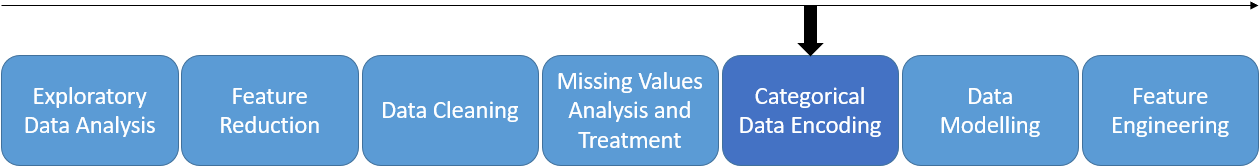

# 6. Categorical Data Encoding

For categorical features we have two ways of encoding them:
- Label encoding, which assigns a unique category in the feature with an integer. The issue with label encoding is that it gives the categories an arbitrary ordering, even when the value assigned to the categories are random and does not reflect an aspect in the category.
- One-hot encoding, which creates a new column for each unique category in the feature. Compared to label encoding, one-hot encoding is a safer approach as it does not impose arbitrary values to categories. The only downside is that the number of features can drastically increase with category variables. To circumvent this, we will follow with PCA (or other dimension reduction methods) to reduce the number of dimensions.

For our case, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories.

In [58]:
def label_encoding(df):
    
    # label encode features with only 2 categories
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()

    # track the columns that is transformed
    le_track = []

    # iterate through the column names in the dataset
    for col in df:
        # if the columns are categorical:
        if df[col].dtype == 'object':
        
            # if the number of categories are 2, we use Label Encoding:
            if df[col].nunique() <= 2:
                # fit the column
                le.fit(df[col])
                # transform the data set
                df[col] = le.transform(df[col])           

    # one-hot encode remaining categories
    df = pd.get_dummies(df)
    
    return df

In [59]:
df = label_encoding(df)

# 7. Modelling - Logistic Regression Using Reduced Features

We start by using our reduced features directly into a Logistic Regression model. We use a 80/20 train-test split, where our training and testing data is stratified across `TARGET`.

In [60]:
# We define the training and test data sets

from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'TARGET']
y = df.loc[:, df.columns == 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def show_roc_auc(clf, X_test, y_test):
    roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='ROC_AUC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [62]:
X_train.shape

(246005, 65)

In [63]:
from sklearn.linear_model import LogisticRegression

y_train_lr = y_train.copy()
y_train_lr = y_train_lr.squeeze()

LogisticReg = LogisticRegression(solver='liblinear')
LogisticReg.fit(X_train, y_train_lr)

LogisticRegression(solver='liblinear')

Train Result:
Accuracy Score: 91.92%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.919343      0.448980   0.91925       0.684161       0.881371
recall          0.999881      0.001108   0.91925       0.500494       0.919250
f1-score        0.957922      0.002210   0.91925       0.480066       0.880767
support    226145.000000  19860.000000   0.91925  246005.000000  246005.000000
_______________________________________________
Confusion Matrix: 
 [[226118     27]
 [ 19838     22]]

Test Result:
Accuracy Score: 91.92%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.919307     0.300000  0.919206      0.609653      0.869311
recall         0.999876     0.000604  0.919206      0.500240      0.919206
f1-score       0.957900     0.001206  0.919206      0.479553 

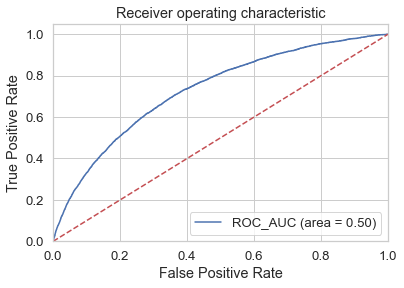

In [64]:
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=True)
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=False)
show_roc_auc(LogisticReg, X_test, y_test)

### Observations and Comments:

- We note that this simple setup yields very poor results. The AUC is only about 0.50, and the regression model is unable to discern false positive (i.e. they mis-classified defaulters as non-defaulters). Recall scores are less than 1%.


- We think there could be several major issues why this is the case, including:

    - Our dataset is imbalanced, with c.90% in the data as non-defaulters. Thus the model is unable to pick up the difference from the training.
    
    - The number of features are too large which could affect the model's performance. Also, there is a possibility that we have not picked the correct features that are important to the model, despite it being based on correlations (which is already somewhat weak to begin with).
    
    - There may be better models suited for imbalanced dataset (e.g. Decision Tree based algorithms like Random Forests or Gradient Boosted Trees).
    

- Next, we will attempt to address the issues we have identified above.

---

# 8. Modelling - Logistic Regression with Balanced Dataset

- As discussed, the imbalanced dataset resulted in our model getting high accuracy by just predicting the majority class (i.e. non-defaults), but fail to capture the minority class (defaults). The recall value of the model trained using such dataset is very low.


- There are a number of techniques on handling imbalanced data, including resampling (either upsample the minority class, or downsample the majority class). This can balance the class distribution but does not provide any additional information to the mode. Other techniques such as SMOTE create synthetic minority class datasets.

For our case, we will attempt to balance the dataset using SMOTE (Synthetic Minority Oversampling Technique). 
> SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.


This procedure can be used to create as many synthetic examples for the minority class as required. As described in the original paper, the authors suggest first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.


*Sources:*
- https://arxiv.org/pdf/1106.1813.pdf
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/*

In [65]:
# We define the training and test data sets

from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'TARGET']
y = df.loc[:, df.columns == 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)

## 8.1 Simple Balanced Oversampling with SMOTE

We implement a simple oversampling of our training data with SMOTE, which creates the same number of default data-points as non-default datapoints (thus changes the default/non-default ratio from 10:90 to 50:50, and almost doubling the total number of training data points).

In [66]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y= pd.DataFrame(data=os_data_y, columns=['TARGET'])

X_train = os_data_X
y_train = os_data_y

In [67]:
from sklearn.linear_model import LogisticRegression

y_train_lr = y_train.copy()
y_train_lr = y_train_lr.squeeze()

LogisticReg = LogisticRegression(solver='liblinear')
LogisticReg.fit(X_train, y_train_lr)

LogisticRegression(solver='liblinear')

Train Result:
Accuracy Score: 91.39%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.871880       0.966677   0.91392       0.919278   
recall          0.970444       0.857397   0.91392       0.913920   
f1-score        0.918525       0.908763   0.91392       0.913644   
support    226145.000000  226145.000000   0.91392  452290.000000   

            weighted avg  
precision       0.919278  
recall          0.913920  
f1-score        0.913644  
support    452290.000000  
_______________________________________________
Confusion Matrix: 
 [[219461   6684]
 [ 32249 193896]]

Test Result:
Accuracy Score: 89.77%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.922990     0.185572  0.897727      0.554281      0.863459
recall         0.969648     0.078751  0.897727      0.5

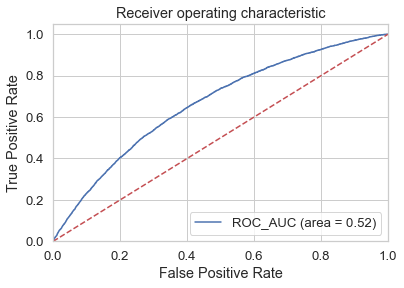

In [68]:
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=True)
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=False)
show_roc_auc(LogisticReg, X_test, y_test)

### Observations:

- Using SMOTE to balance the large training dataset resulted in good performance on the trained dataset, but still a relatively poor performance (in terms of recall scores) for test dataset, suggesting that model has overfitted the training dataset (given now there is a large abundance of synthetic default-class data). Nonetheless, balancing the data in this way has already resulted in a better performance of the model in terms of recall scores (to 7% from less than 0.1% in the unbalanced dataset).


- Next, we will follow the SMOTE author's advice to try to reduce the size of training dataset - oversample default-data with SMOTE, and undersample the non-default data - to see if we can reduce the model's overfitting issues

## 8.2 Combine Oversampling with SMOTE and Undersampling

We will now process our training dataset to oversample the minority default class with SMOTE, and undersample the majority non-default class via random undersampling. We will also keep the size of our training set roughly the same (before and after the balancing, to around 246,000 data points).

The more balance ratio should be around 10:20 from 10:90.

In [69]:
# We define the training and test data sets

from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'TARGET']
y = df.loc[:, df.columns == 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)


# oversample with SMOTE and random undersample for imbalanced dataset

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over_r = 0.1
under_r = 0.5

# summarize class distribution
counter = Counter(np.array(y_train).reshape(-1))
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=over_r)
under = RandomUnderSampler(sampling_strategy=under_r)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(np.array(y_train).reshape(-1))
print(counter)

Counter({0: 226145, 1: 19860})
Counter({0: 45228, 1: 22614})


In [70]:
# We now run our model with our new training data

from sklearn.linear_model import LogisticRegression

y_train_lr = y_train.copy()
y_train_lr = y_train_lr.squeeze()

LogisticReg = LogisticRegression(solver='liblinear')
LogisticReg.fit(X_train, y_train_lr)

LogisticRegression(solver='liblinear')

Train Result:
Accuracy Score: 73.07%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.743316      0.67446  0.730683      0.708888      0.720364
recall         0.910409      0.37123  0.730683      0.640820      0.730683
f1-score       0.818421      0.47888  0.730683      0.648650      0.705241
support    45228.000000  22614.00000  0.730683  67842.000000  67842.000000
_______________________________________________
Confusion Matrix: 
 [[41176  4052]
 [14219  8395]]

Test Result:
Accuracy Score: 86.21%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.937235     0.231415  0.862053      0.584325      0.880255
recall         0.910943     0.305337  0.862053      0.608140      0.862053
f1-score       0.923902     0.263286  0.862053      0.593594      0.870571
support   

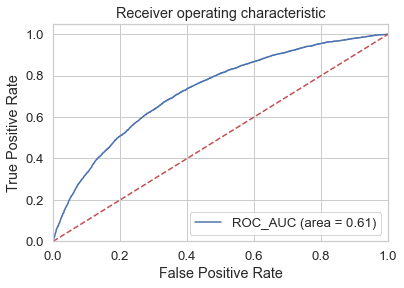

In [71]:
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=True)
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=False)
show_roc_auc(LogisticReg, X_test, y_test)

### Observations:

- We note that after combining oversampling with undersampling, there is a drastic improvement in the model. The recall score has increased to 0.3, and AUC is now 0.61 (from 0.52 previously).

- We also note that there is less overfitting of the model, where the recall scores are relatively close for both the training and test datasets.

---

# 9. Modelling - Logistic Regression using Dimensionally-Reduced Dataset

- While we have reduced the number of our features of our training data, it is still relatively large at 66 features.


- We will see if we can meaningfully reduce the dimension of our dataset and see if this can improve the performance of our baseline model. We may also try to balance our dataset to see if this helps with performance.

- We will use Principal Component Analysis as the dimension-reduction method.

## 9.1 - Standardizing the Data

Here we standardize the numerical dataset __only__ (i.e. the categorical data is labelled using one-hot encoding, but we __do not__ standardize these data). We reason that we do not standardize the categorical data because it is only ones and zeros, and changing the distribution to have mean of zero and variance of one may affect the PCA performance. From our experiments, when we use this method, we can describe 80% of the variation using only 15 features post PCA. If we standardize all our data, we need around 60 features post PCA to describe 80% of the variation.


We split the data into training and test dataset, and train the Standard Scaler using only the training dataset. Test data is then standardized using the trained Standard Scaler.

In [72]:
# We define the training and test data sets

from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'TARGET']
y = df.loc[:, df.columns == 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)
# X_cols = list(X_train.columns)

In [73]:
coltype_num = list(X_train.select_dtypes(include=['float64']).columns)
coltype_cat = list(X_train.select_dtypes(include=['int32', 'uint8']).columns)

col_to_std = coltype_num

In [74]:
# separate data into ones we want to standardized, and other (categorical) that are not to be standardized
X_train_std = X_train[col_to_std].copy()
X_test_std = X_test[col_to_std].copy()

X_train_cat = X_train[coltype_cat].copy()
X_test_cat = X_test[coltype_cat].copy()

In [75]:
# Scale the numerical features

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train_std)

X_train_std = ss.transform(X_train_std)
X_test_std = ss.transform(X_test_std)

In [76]:
# putting the dataframes back together
X_train_std = pd.DataFrame(X_train_std)
X_train_std.columns = col_to_std
X_train_cat = X_train_cat.reset_index(drop=True)
X_train = pd.concat([X_train_std, X_train_cat], axis=1)
y_train = y_train.reset_index(drop=True)

X_test_std = pd.DataFrame(X_test_std)
X_test_std.columns = col_to_std
X_test_cat = X_test_cat.reset_index(drop=True)
X_test = pd.concat([X_test_std, X_test_cat], axis=1)
y_test = y_test.reset_index(drop=True)

## 9.2 Run Principal Component Analysis

We run a quick test to see how many principal components we'd like to keep. The original dataset has a total of __66__ features

In [77]:
def pca_fn(X_train_pca, X_test_pca, n, calc_pca=True):

    from sklearn.decomposition import PCA

    pca_dims = n
    pca_cols = ['pca'+str(i) for i in range(1, pca_dims+1)]

    pca = PCA(n_components = pca_dims)
    pca.fit(X_train_pca)
    
    if calc_pca:
        X_train_reducedD = pca.transform(X_train_pca)
        X_train_reducedD = pd.DataFrame(data = X_train_reducedD, columns = pca_cols)

        X_test_reducedD = pca.transform(X_test_pca)
        X_test_reducedD = pd.DataFrame(data = X_test_reducedD, columns = pca_cols)
    
        return X_train_reducedD, X_test_reducedD, pca.explained_variance_ratio_
    
    else:
        return pca.explained_variance_ratio_

<Figure size 432x288 with 0 Axes>

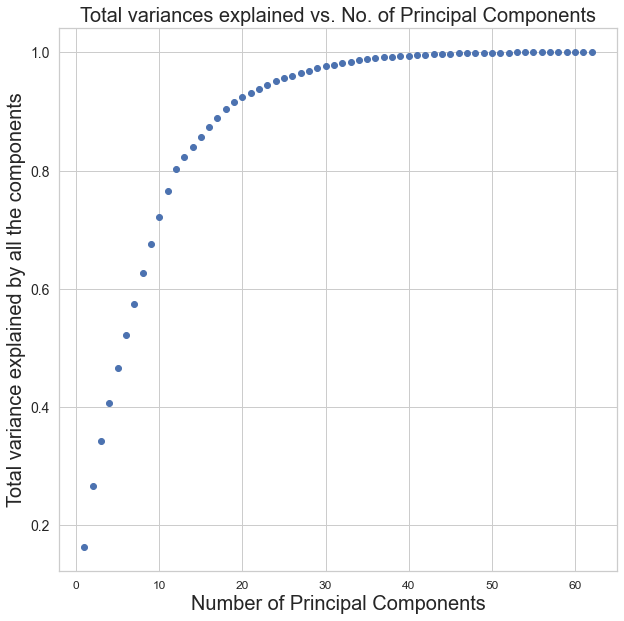

In [78]:
explained = pca_fn(X_train, X_test, 62, calc_pca=False)
explained_marginal = np.cumsum(explained)

index = [i for i in range(1, 63)]

import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Number of Principal Components',fontsize=20)
plt.ylabel('Total variance explained by all the components', fontsize=20)
plt.title("Total variances explained vs. No. of Principal Components",fontsize=20)

plt.scatter(index, explained_marginal)

### Observation:

It appears that, with 15 principal components, we can explain more than 80% of the variation. Hence, we will use this number for feature reduction.

In [79]:
# we use PCA to reduce our dataset from 66 features to 15 features

X_train, X_test, explained = pca_fn(X_train, X_test, 15, calc_pca=True)

# save a copy of PCA datasets
X_train_pca = X_train.copy()
X_test_pca = X_test.copy()

y_train_pca = y_train.copy()
y_test_pca = y_test.copy()

## 9.3 Run Model on Reduced-Dimension Dataset

In [80]:
# We now run our model with our new training data

from sklearn.linear_model import LogisticRegression

y_train_lr = y_train.copy()
y_train_lr = y_train_lr.squeeze()

LogisticReg = LogisticRegression(solver='liblinear')
LogisticReg.fit(X_train, y_train_lr)

LogisticRegression(solver='liblinear')

Train Result:
Accuracy Score: 91.93%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.919280      0.375000  0.919262       0.647140       0.875340
recall          0.999978      0.000151  0.919262       0.500064       0.919262
f1-score        0.957932      0.000302  0.919262       0.479117       0.880623
support    226145.000000  19860.000000  0.919262  246005.000000  246005.000000
_______________________________________________
Confusion Matrix: 
 [[226140      5]
 [ 19857      3]]



C:\Users\aooi5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aooi5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aooi5\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 91.93%
_______________________________________________
CLASSIFICATION REPORT:
                      0       1  accuracy     macro avg  weighted avg
precision      0.919271     0.0  0.919271      0.459635      0.845059
recall         1.000000     0.0  0.919271      0.500000      0.919271
f1-score       0.957938     0.0  0.919271      0.478969      0.880604
support    56537.000000  4965.0  0.919271  61502.000000  61502.000000
_______________________________________________
Confusion Matrix: 
 [[56537     0]
 [ 4965     0]]



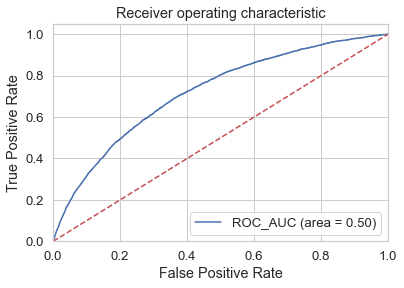

In [81]:
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=True)
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=False)
show_roc_auc(LogisticReg, X_test, y_test)

### Observations:

- We note that dimension reduction did not improve the performance of our model. There is no discernible difference in performance of the model from when we used our original dataset, i.e. there is poor recall and the model basically is predicting all cases as non-default cases.


- We will try to balance our dataset using the previous over- and under-sampling technique.

## 9.3 Run Model on Balanced Reduced-Dimension Dataset

In [82]:
# oversample with SMOTE and random undersample for imbalanced dataset

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over_r = 0.1
under_r = 0.5

# summarize class distribution
counter = Counter(np.array(y_train).reshape(-1))
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=over_r)
under = RandomUnderSampler(sampling_strategy=under_r)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(np.array(y_train).reshape(-1))
print(counter)

Counter({0: 226145, 1: 19860})
Counter({0: 45228, 1: 22614})


In [83]:
# We now run our model with our new training data

from sklearn.linear_model import LogisticRegression

y_train_lr = y_train.copy()
y_train_lr = y_train_lr.squeeze()

LogisticReg = LogisticRegression(solver='liblinear')
LogisticReg.fit(X_train, y_train_lr)

LogisticRegression(solver='liblinear')

Train Result:
Accuracy Score: 70.28%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.725337      0.600065  0.702751      0.662701      0.683580
recall         0.891837      0.324578  0.702751      0.608207      0.702751
f1-score       0.800016      0.421282  0.702751      0.610649      0.673771
support    45228.000000  22614.000000  0.702751  67842.000000  67842.000000
_______________________________________________
Confusion Matrix: 
 [[40336  4892]
 [15274  7340]]

Test Result:
Accuracy Score: 84.80%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.938162     0.213670  0.848021      0.575916      0.879674
recall         0.893574     0.329305  0.848021      0.611440      0.848021
f1-score       0.915325     0.259174  0.848021      0.587250      0.862355
suppo

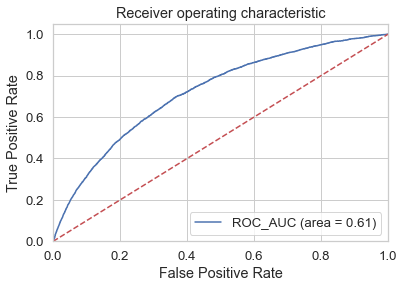

In [84]:
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=True)
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=False)
show_roc_auc(LogisticReg, X_test, y_test)

### Observations:

- We note that after combining oversampling with undersampling, there is a drastic improvement in the model. The recall score has increased to 0.3, and AUC is now 0.6, which is comparable to the model when we used the full number of features.


- Accordingly we can use PCA first to reduce a large dimensionality of our data (more than 70% reduction in features) without any discernible difference in performance.

# 10. Modelling - Using Random Forest Classifier

- We note that there may be other algorithms for classification problems, and some may be better suited for imbalanced datasets. We will use a decision trees algorithm, which may perform well on imbalanced data. Tree base algorithm work by learning a hierarchy of if/else questions. This can force both classes to be addressed.

*Reference:*

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [85]:
# We define the training and test data sets

from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'TARGET']
y = df.loc[:, df.columns == 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)
# X_cols = list(X_train.columns)

In [86]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

y_train_lr = y_train.copy()
y_train_lr = y_train_lr.squeeze()

# fit the predictor and target
rfc.fit(X_train, y_train_lr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.8s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    1.6s finished


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.999965      1.000000  0.999967       0.999982       0.999967
recall          1.000000      0.999597  0.999967       0.999799       0.999967
f1-score        0.999982      0.999799  0.999967       0.999890       0.999967
support    226145.000000  19860.000000  0.999967  246005.000000  246005.000000
_______________________________________________
Confusion Matrix: 
 [[226145      0]
 [     8  19852]]



[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


Test Result:
Accuracy Score: 91.94%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.919459     0.722222  0.919401      0.820840      0.903536
recall         0.999912     0.002618  0.919401      0.501265      0.919401
f1-score       0.957999     0.005218  0.919401      0.481608      0.881082
support    56537.000000  4965.000000  0.919401  61502.000000  61502.000000
_______________________________________________
Confusion Matrix: 
 [[56532     5]
 [ 4952    13]]



[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.3s finished


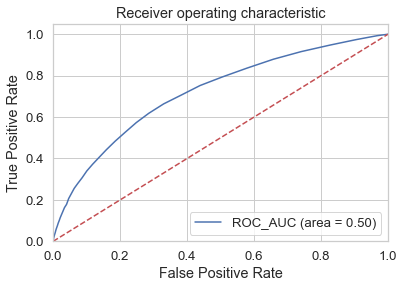

In [87]:
print_score(rfc, X_train, y_train, X_test, y_test, train=True)
print_score(rfc, X_train, y_train, X_test, y_test, train=False)
show_roc_auc(rfc, X_test, y_test)

### Observations and Comments:

- From the results, we see that the algorithm may be overfitting the training data. The recall for training is very high at 0.99, but very poor for the test data at less than 0.1%.


- For our case, the performance of random forest is comparable to that of our raw logistic regression.

# 11. Feature Engineering

- We will also test if we can improve our model performance using feature engineering. From our knowledge of credit analysis, we can create several features that may have some impact on telling if a client will default on a loan or not.


- We will create the following features:
    - CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
    - ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
    - CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
    - DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [88]:
df_new = df.copy()

In [89]:
df_new['CREDIT_INCOME_PERCENT'] = df_new['AMT_CREDIT'] / df_new['AMT_INCOME_TOTAL']
df_new['ANNUITY_INCOME_PERCENT'] = df_new['AMT_ANNUITY'] / df_new['AMT_INCOME_TOTAL']
df_new['CREDIT_TERM'] = df_new['AMT_ANNUITY'] / df_new['AMT_CREDIT']
df_new['DAYS_EMPLOYED_PERCENT'] = df_new['DAYS_EMPLOYED'] / df_new['DAYS_BIRTH']

In [90]:
# we also remove some of these origial data since (1) they are not highly-correlated to the target,
# (2) they are now highly correlated to our newly-created features

df_new.drop(['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY'], axis=1)

df_new.head()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_EMPLOYED,FLOORSMAX_AVG,DAYS_REGISTRATION,AMT_GOODS_PRICE,OWN_CAR_AGE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,CODE_GENDER,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,1,0.139376,0.262949,0.083037,25.920548,3.106849,5.808219,1.745205,0.0833,9.994521,3.510,0.0,2.025,4.065975,0.247005,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2.007889,0.121978,0.060749,0.067329
1,0,0.000000,0.622246,0.311267,45.931507,2.268493,0.797260,3.254795,0.2917,3.249315,11.295,0.0,2.700,12.935025,0.356985,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,4.790750,0.132217,0.027598,0.070862
2,0,0.729567,0.555912,0.000000,52.180822,2.232877,6.934247,0.616438,0.0000,11.671233,1.350,26.0,0.675,1.350000,0.067500,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2.000000,0.100000,0.050000,0.011814
3,0,0.000000,0.650442,0.000000,52.068493,1.690411,6.676712,8.326027,0.0000,26.939726,2.970,0.0,1.350,3.126825,0.296865,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2.316167,0.219900,0.094941,0.159905
4,0,0.000000,0.322738,0.000000,54.608219,3.030137,9.473973,8.323288,0.0000,11.810959,5.130,0.0,1.215,5.130000,0.218655,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,4.222222,0.179963,0.042623,0.152418


## 11.1 EDA on Engineered Features

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


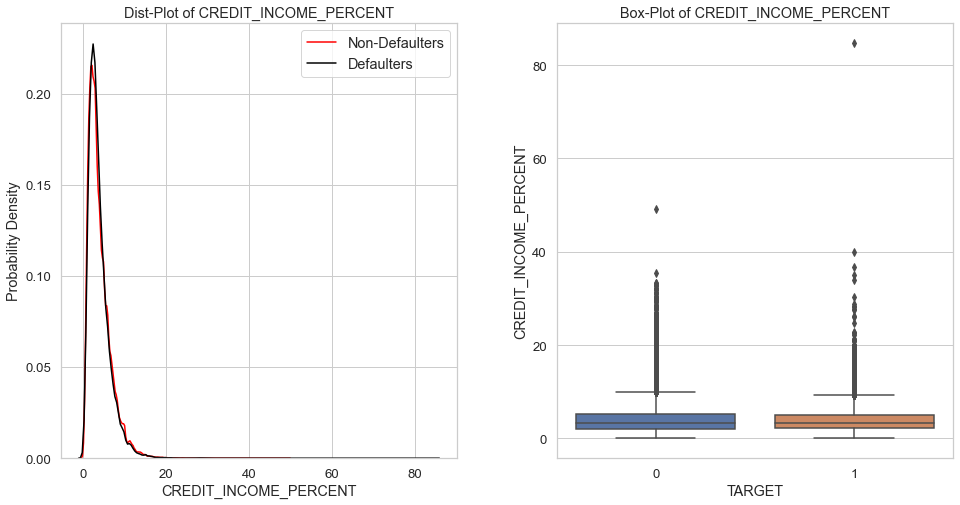

In [91]:
plot_continuous_variables(df_new, 'CREDIT_INCOME_PERCENT', plots = ['distplot', 'box'], figsize = (16,8))

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


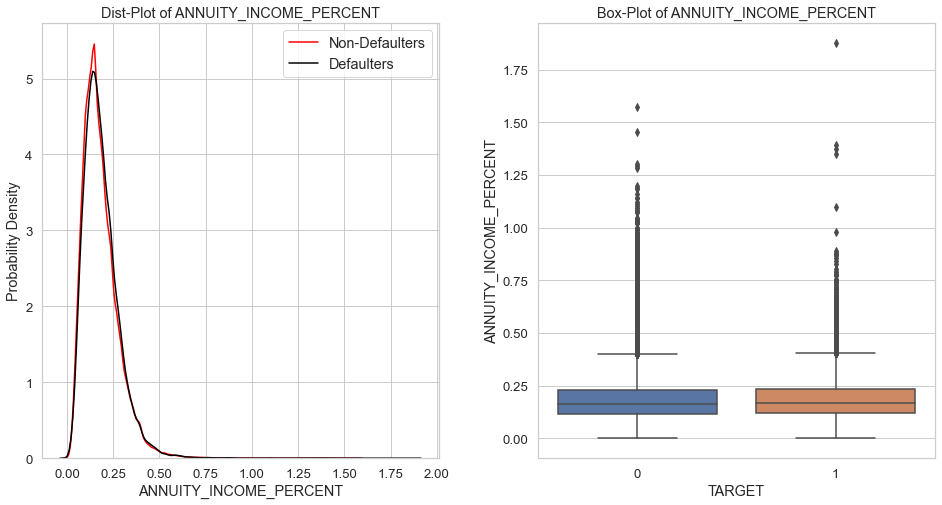

In [92]:
plot_continuous_variables(df_new, 'ANNUITY_INCOME_PERCENT', plots = ['distplot', 'box'], figsize = (16,8))

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


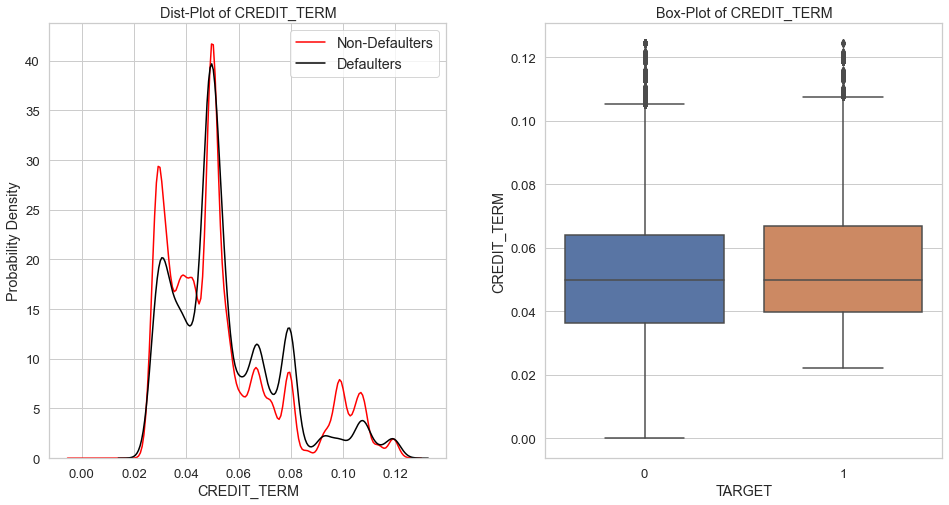

In [93]:
plot_continuous_variables(df_new, 'CREDIT_TERM', plots = ['distplot', 'box'], figsize = (16,8))

C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aooi5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


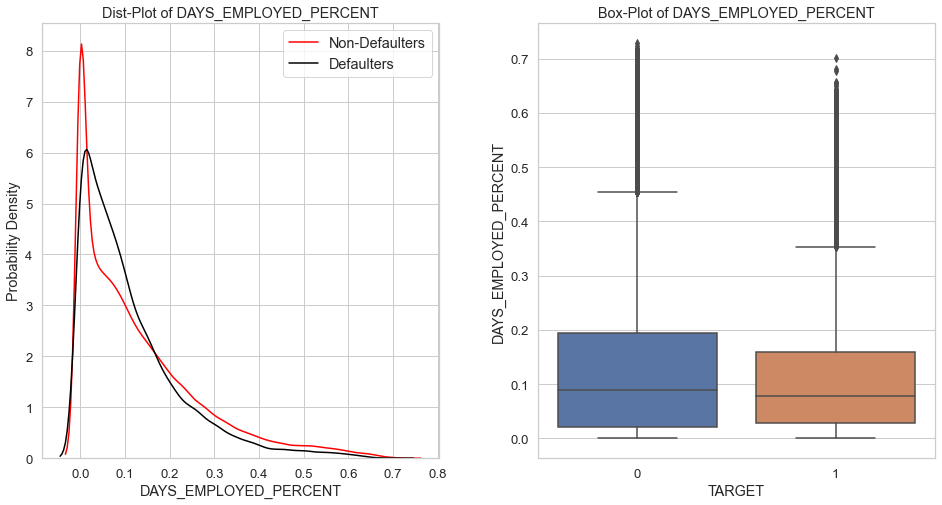

In [94]:
plot_continuous_variables(df_new, 'DAYS_EMPLOYED_PERCENT', plots = ['distplot', 'box'], figsize = (16,8))

### Observations:

- At a glance, we do not see a glaring difference for these new features. Their KDE plots appear similar, and their medians are also around the same. Accordingly, we do not expect them to make a significant difference to the performance of the model.

## 11.2 Running Logistic Regression with the New Features

In [95]:
# We define the training and test data sets

from sklearn.model_selection import train_test_split

X = df_new.loc[:, df_new.columns != 'TARGET']
y = df_new.loc[:, df_new.columns == 'TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True, stratify=y)
# X_cols = list(X_train.columns)

In [96]:
# We now run our model with our new training data

from sklearn.linear_model import LogisticRegression

y_train_lr = y_train.copy()
y_train_lr = y_train_lr.squeeze()

LogisticReg = LogisticRegression(solver='liblinear')
LogisticReg.fit(X_train, y_train_lr)

LogisticRegression(solver='liblinear')

Train Result:
Accuracy Score: 91.92%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.919356      0.440678  0.919241       0.680017       0.880713
recall          0.999854      0.001309  0.919241       0.500582       0.919241
f1-score        0.957917      0.002611  0.919241       0.480264       0.880795
support    226145.000000  19860.000000  0.919241  246005.000000  246005.000000
_______________________________________________
Confusion Matrix: 
 [[226112     33]
 [ 19834     26]]

Test Result:
Accuracy Score: 91.92%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.919364     0.437500  0.919238      0.678432      0.880463
recall         0.999841     0.001410  0.919238      0.500625      0.919238
f1-score       0.957915     0.002811  0.919238      0.480363 

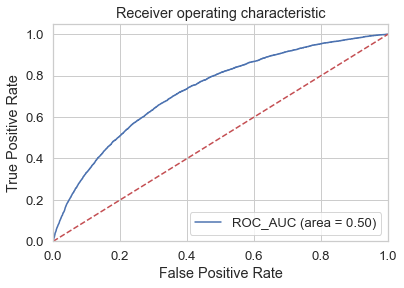

In [97]:
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=True)
print_score(LogisticReg, X_train, y_train, X_test, y_test, train=False)
show_roc_auc(LogisticReg, X_test, y_test)

### Observations

As expected, we note that these features did not add much in terms of performance to the Logistic Regression model. 

# 12. Conclusion

- We worked on a Supervised Binary Learning Classification problem, with a dataset of a large number of features (121) consisting of both numerical and categorical data, and highly-imbalanced dataset (10:90). We also note that there are a large number of missing data in our dataset.


- We started with reducing the number of features. This is mainly done by selecting features that are relatively highly-correlated with the Target variable, and are not highly-correlated with one another. Using this, and verifying with EDA, we narrowed down the features we worked with to 25 features.


- We did not do complex imputation for the data, and instead replaced them with 0. We also used one-hot encoding for our categeorical data, which resulted in increased dimensionality to 66 from 25.


- For modeling, we mainly used the Logistic Regression to classify our data. We combine this with other techniques such as data balancing, and dimensionality reduction. We also tried using the Random Forest Classifies as a comparison algorithm to Logistic Regression.


- Overall, we note that the results from our models are generally quite poor:
    - With just our dataset (of 25 features), the model is unable to discern the defaulters from non-defaulters - the model's most important job.
    - We found that we can improve the model by balancing the data, and speed this up by feeding it data that is dimensionally-reduced using PCA. Using this method, we were able to raise our recall metric from less than 0.1% to 30%, a drastic increase. The ROC-AUC score is already raised from 0.5 to 0.6, about a 20% increase.
    - We also tried comparing the performance of the random forest classifier, but did not get an improved performance. 
    - Finally we tried some simple feature engineering. However, this also did not increase the model performance as they do not seem to have distingushing features between default and non-defaulters.


- The results of of various models are summarized below:



| Model | Balanced | Bal. Method | Dim. Reduced | Recall-Train | Recall-Test | ROC-AUC |
| --- | --- | --- | ---| --- | --- | --- |
| Log. Regression | N | N | N |0.0011 | 0.0006 | 0.50 |
| Log. Regression | Y | 50:50 | N |0.8574 | 0.0788 | 0.52 |
| Log. Regression | Y | 10:20 | N |0.3723 | 0.3074 | 0.61 |
| Log. Regression | N | N | Y |0.0000 | 0.0000 | 0.50 |
| Log. Regression* | Y | 10:20 | Y |0.3249 | 0.3309 | 0.61 |
| Random Forest | N | N | N |0.9998 | 0.0026 | 0.50 |
| Log. Regression (w. Feat. Eng.) | N | N | N |0.0001 | 0.0001 | 0.50 |


- We feel that the poor model performances could be due to the following reasons:


- The features in the raw dataset do not have high correlations with the target variable: While we have chosen features in the order of correlations, their absolute correlation are generally low. For instance, the highest Pearsons correlations with the target is only at 0.17. This could make it hard for the models to pick up distinguishing features. Furthermore, we selected only 25 features out of 122, which likely reduces the information content for mode training.
    
    
- There are a lot of missing data. From our analysis we see many features with more than 60% of data missing. Even for important features such as external credit scores, there can be more than 50% of data that is missing. Furthermore, we did not do any complex imputation of missing data and replaced them with zeros, which could affect model performance.


- The data is significantly imbalanced. However we see that using data balancing technique we can get stronger model performance.


- For further work we can explore:
    - Methods to select important features. For instance, we can use RFE (Recursvie Feature Elimination, which selects features by recursively considering smaller and smaller sets of features).
    - Better imputation methods for missing values. For important features such as external credit scores, we can explore using methods such as XGBoostRegressor to fill up the missing values.
    - Explore other classifier models.
    - Cross-validation methods to tune model parameters.

# --- END ---